# 한글 폰트 사용

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,562 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123586 files and dire

한글 출력 확인

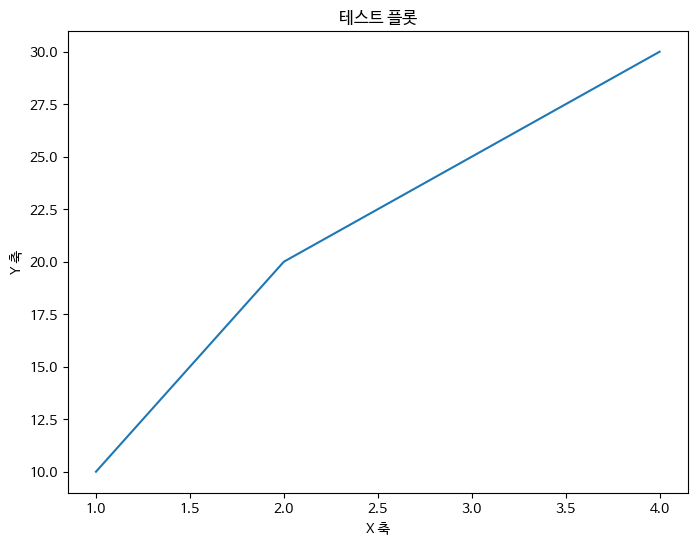

In [ ]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# 플롯 예시
plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title('테스트 플롯')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.show()

# 2022년 국민여행조사 데이터 불러오기

In [ ]:
import pandas as pd
travel = pd.read_excel('/content/travel.xlsx')
travel.head()

,ID,D_TRA1_CASE,D_TRA1_1_SMONTH,D_TRA1_1_SPOT,D_TRA1_1_Q6_Ar,A4_1,A4_2,A4_3,A5_1,A5_2,...,A1_2,A1_3,A9D,A9E,A9F,A9F_1,A9F_2,A9F_3,A9F_4,DQ7
0,11010550211_277566,,,,,,,,,,...,,,,,,,,,,1
1,11010550211_277569,1,1,32070,,2,14,11,1,2,...,,,180000,170000,130000,0,0,0,0,1
2,11010550211_277571,,,,,,,,,,...,,,,,,,,,,1
3,11010550211_277572,1,1,39020,,2,5,1,1,2,...,8,10,280000,90000,240000,0,160000,0,10000,1
4,11010550211_277588,1,1,32030,,2,8,6,1,2,...,,,21999,51999,106002,0,0,0,0,1


# travel 데이터 전처리1

* xlsx의 빈 칸을 null로 인식하지 않아서 0으로 바꾼 후 처리
* 여행 시기(월)와 여행지가 0인 값은 null 값으로 취급
* 선별 지출이 100 이하인 금액 0으로 대체
* 만족도가 9로 기입된 데이터는 0으로 처리 : 만족도 값은 1, 2, 3, 4, 5

In [ ]:
import numpy as np

# null값 0으로 처리
travel.replace(r'^\s*$', 0, regex=True, inplace=True)

# 여행 시기(월)와 여행지가 0보다 큰 값만 추출
travel = travel[travel.D_TRA1_1_SMONTH > 0]
travel = travel[travel.D_TRA1_1_SPOT > 0]

# 선별 지출 비용이 100 이하인 금액 0으로 대체
travel.loc[travel['A9G_1'] <= 100, 'A9G_1'] = 0
travel.loc[travel['A9G_2'] <= 100, 'A9G_2'] = 0
travel.loc[travel['A9D'] <= 100, 'A9D'] = 0
travel.loc[travel['A9E'] <= 100, 'A9E'] = 0
travel.loc[travel['A9F'] <= 100, 'A9F'] = 0
travel.loc[travel['A9F_1'] <= 100, 'A9F_1'] = 0
travel.loc[travel['A9F_2'] <= 100, 'A9F_2'] = 0
travel.loc[travel['A9F_3'] <= 100, 'A9F_3'] = 0

In [ ]:
for col in travel.columns:
    if 'A10' in col:
        print(travel.describe()[col])

count    25016.000000
mean         3.694635
std          1.439934
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: A10, dtype: float64
count    25016.000000
mean         4.011113
std          1.695120
min          0.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          9.000000
Name: A10A_1, dtype: float64
count    25016.000000
mean         4.948793
std          2.758704
min          0.000000
25%          4.000000
50%          4.000000
75%          9.000000
max          9.000000
Name: A10A_2, dtype: float64
count    25016.000000
mean         3.685122
std          1.525461
min          0.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          9.000000
Name: A10A_3, dtype: float64
count    25016.000000
mean         1.159618
std          1.946143
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max          5.000000
Name: A

In [ ]:
# 만족도가 9로 기입된 데이터는 0으로 처리
for col in travel.columns:
    if 'A10' in col:
        travel.loc[travel[col] == 9, col] = 0

travel.head()

,ID,D_TRA1_CASE,D_TRA1_1_SMONTH,D_TRA1_1_SPOT,D_TRA1_1_Q6_Ar,A4_1,A4_2,A4_3,A5_1,A5_2,...,A1_2,A1_3,A9D,A9E,A9F,A9F_1,A9F_2,A9F_3,A9F_4,DQ7
1,11010550211_277569,1,1,32070,0,2,14,11,1,2,...,0,0,180000,170000,130000,0,0,0,0,1
3,11010550211_277572,1,1,39020,0,2,5,1,1,2,...,8,10,280000,90000,240000,0,160000,0,10000,1
4,11010550211_277588,1,1,32030,0,2,8,6,1,2,...,0,0,21999,51999,106002,0,0,0,0,1
6,11010550211_277594,1,1,32030,0,2,1,14,1,2,...,0,0,170001,186000,104001,0,0,0,0,1
7,11010550211_277596,1,1,32010,0,2,14,5,1,2,...,0,0,52000,20000,28000,0,0,0,0,1


# travel 데이터 시각화1
* 비여행 이유 1, 2, 3순위 빈도수 그래프

**D_TRA1_CASE가 1인 것으로 그래프를 그리면 결과 도출 불가**
1. 여행에 관심이 없어서
2. 여행이 재미없을 것 같아서
3. 건강상의 문제로
4. 시간이 없어서
5. 여행 경비가 부족해서
6. 여행 정보가 부족해서
7. 관광시설이 불편해서
8. 함께 여행할 사람이 없어서
9. 가족, 친구와 시간을 맞추기 힘들어서
10. 집안에 돌봐야하는 가족이 있어서
11. 기타
21. 코로나19 때문에

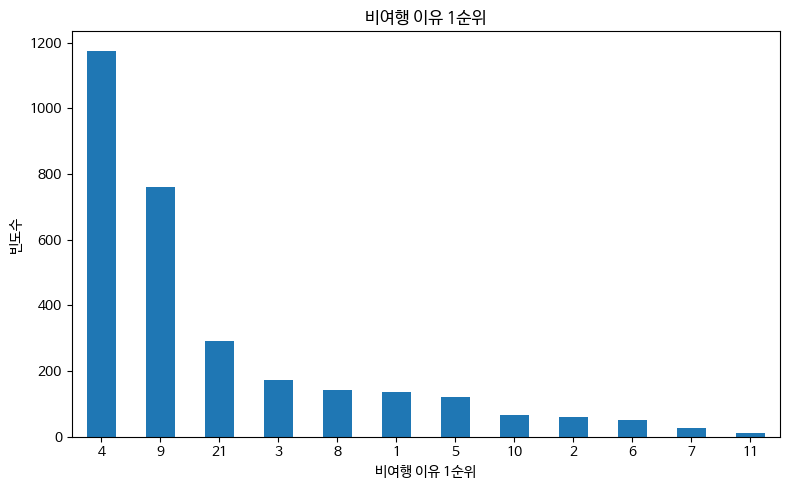

In [ ]:
# 비여행 이유 1순위 빈도수 그래프
# 0으로 기입된 값 제외
travel_visual=travel[travel['B9_1']>0]
category_counts = travel_visual['B9_1'].value_counts()

# 빈도수 그래프
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar')
plt.title('비여행 이유 1순위')
plt.xlabel('비여행 이유 1순위')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.tight_layout()

[비여행 이유 1순위 빈도수 그래프]  
-> 시간이 없다, 시간을 맞추기 힘들다가 제일 많음.  
-> 3위인 코로나19 때문에는 시의성에 의한 것이고 현재는 고려할 요소가 아닌 것으로 보임.

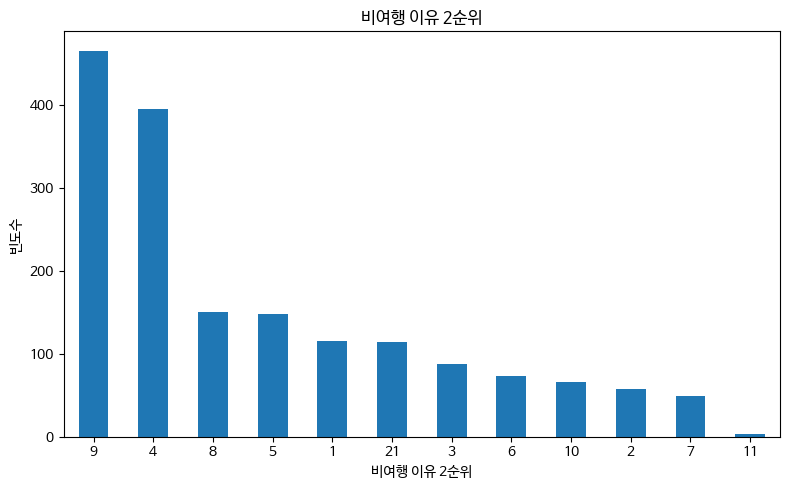

In [ ]:
# 비여행 이유 2순위 빈도수 그래프
# 0으로 기입된 값 제외
travel_visual=travel[travel['B9_2']>0]
category_counts = travel_visual['B9_2'].value_counts()

# 빈도수 그래프
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar')
plt.title('비여행 이유 2순위')
plt.xlabel('비여행 이유 2순위')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.tight_layout()

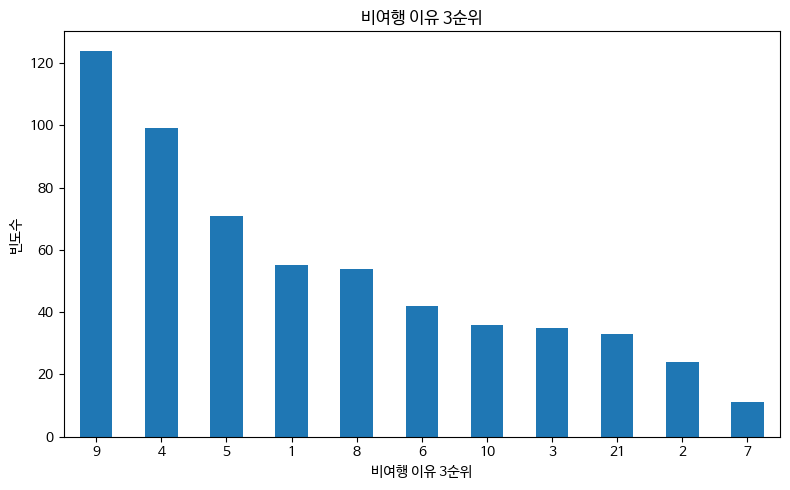

In [ ]:
# 비여행 이유 3순위 빈도수 그래프
# 0으로 기입된 값 제외
travel_visual=travel[travel['B9_3']>0]
category_counts = travel_visual['B9_3'].value_counts()

# 빈도수 그래프
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar')
plt.title('비여행 이유 3순위')
plt.xlabel('비여행 이유 3순위')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.tight_layout()

[비여행 이유 2, 3순위 빈도수 그래프]  
-> 1순위 그래프와 유사, 대부분 시간이 없다는 게 이유  

=> 비여행 이유는 대부분 관광지 자체에 있기보단 대부분 여행객들의 개인 사정에 있다고 봐야함.

# travel 데이터 전처리2

여행1차_여행유형(D_TRA1_CASE)
1. 국내 관광/휴양여행
2. 국내 가족/친지/친구방문여행
3. 국내 단순 가족/친지/친구 방문
4. 국내 출장/업무 여행
5. 국내 단순 출장/업무 경험
6. 1년 이하 해외여행 경험

In [ ]:
# 주제에 알맞은 항목만 분석하기 위해, 여행1차_여행유형을 국내 관광/휴양여행으로 제한
travel=travel[travel['D_TRA1_CASE']==1]
travel=travel.reset_index(drop=True)

여행 활동
1. **자연 및 풍경감상**
2. **음식관광(지역 맛집 등)**
4. **역사 유적지 방문**
9. **지역 문화예술/공연/전시시설 관람**
11. **지역 축제/이벤트 참가**
12. **교육/체험 프로그램 참가**
15. **시티투어**


In [ ]:
# 선별 여행 활동 전처리
travel['A5_2']=travel['A5_2']/2
travel['A5_4']=travel['A5_4']/4
travel['A5_9']=travel['A5_9']/9
travel['A5_11']=travel['A5_11']/11
travel['A5_12']=travel['A5_12']/12
travel['A5_15']=travel['A5_15']/15

# 계절 열 생성
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 4
    elif month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    elif month in [9, 10, 11]:
        return 3

travel['Season'] = travel['D_TRA1_1_SMONTH'].apply(map_month_to_season) # 함수 반영
travel.head()

,ID,D_TRA1_CASE,D_TRA1_1_SMONTH,D_TRA1_1_SPOT,D_TRA1_1_Q6_Ar,A4_1,A4_2,A4_3,A5_1,A5_2,...,A1_3,A9D,A9E,A9F,A9F_1,A9F_2,A9F_3,A9F_4,DQ7,Season
0,11010550211_277569,1,1,32070,0,2,14,11,1,1.0,...,0,180000,170000,130000,0,0,0,0,1,4
1,11010550211_277572,1,1,39020,0,2,5,1,1,1.0,...,10,280000,90000,240000,0,160000,0,10000,1,4
2,11010550211_277588,1,1,32030,0,2,8,6,1,1.0,...,0,21999,51999,106002,0,0,0,0,1,4
3,11010550211_277594,1,1,32030,0,2,1,14,1,1.0,...,0,170001,186000,104001,0,0,0,0,1,4
4,11010550211_277596,1,1,32010,0,2,14,5,1,1.0,...,0,52000,20000,28000,0,0,0,0,1,4


# travel 데이터 시각화2

전반적 만족도

<Axes: xlabel='A10', ylabel='count'>

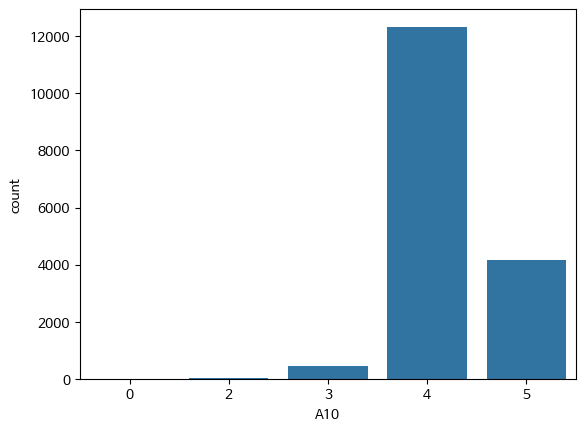

In [ ]:
sns.countplot(x='A10', data=travel)

대부분 4에 해당하고 만족도가 전체적으로 높음 + 1에 해당하는 경우가 아예 없다

성비 그래프

<Axes: xlabel='BSEX', ylabel='count'>

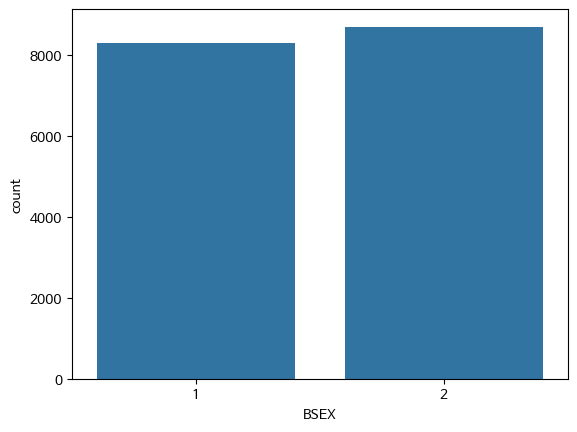

In [ ]:
import seaborn as sns
sns.countplot(x='BSEX', data=travel)

travel 데이터 나이대 분포 그래프

<Axes: xlabel='BAGE', ylabel='count'>

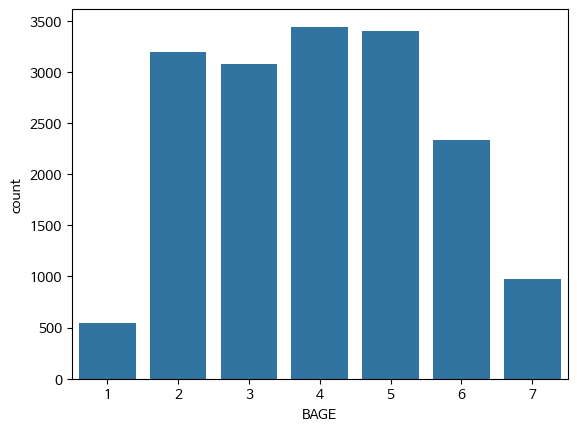

In [ ]:
sns.countplot(x='BAGE', data=travel)

청소년층, 노년층이 제일 적고 4-50대가 많이 분포

## 국내 여행 활동

1. 자연 및 풍경감상
2. 음식관광(지역 맛집 등)
3. 야외 위락 및 스포츠, 레포츠 활동
4. 역사 유적지 방문
5. 테마파크, 놀이시설, 동/식물원 방문
6. 휴식/휴양
7. 온천/스파
8. 쇼핑
9. 지역 문화예술/공연/전시시설 관람
10. 스포츠 경기관람
11. 지역 축제/이벤트 참가
12. 교육/체험 프로그램 참가
13. 종교/성지순례
14. 카지노, 경마, 경륜 등
15. 시티투어
16. 드라마 촬영지 방문
17. 유흥/오락
18. 가족/친지/친구 방문
19. 회의참가/시찰
20. 교육/훈련/연수
21. 기타

국내 여행 활동 빈도수

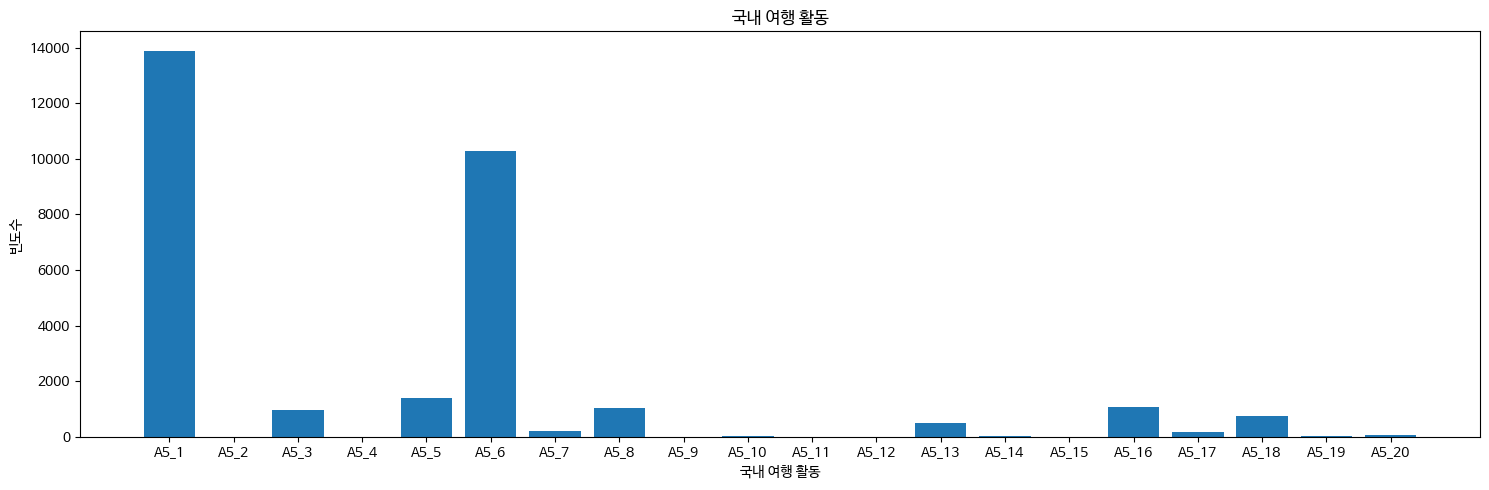

In [ ]:
plt.figure(figsize=(15, 5))
x=[]
y=[]
for i in range(1, 21):
    x.append(f'A5_{i}')
    y.append(len(travel[travel[f'A5_{i}']==i]))

plt.bar(x, y)
plt.title('국내 여행 활동')
plt.xlabel('국내 여행 활동')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.tight_layout()

[국내 여행 활동 빈도수]  
자연 및 풍경감상, 휴식/휴양, 테마파크, 놀이시설, 동/식물원 방문이 제일 많은 빈도,   
  -> 해당 지역의 자연환경, 관광 시설 등을 국내 여행에서 자주 즐긴다고 할 수 있음.

연령대 별 국내 여행 활동
* x축 : 연령대
* y축 : 연령대 별 여행 활동 비율 (연령대 별 특정 여행 활동 수 / 연령대별 전체 여행 활동 수)

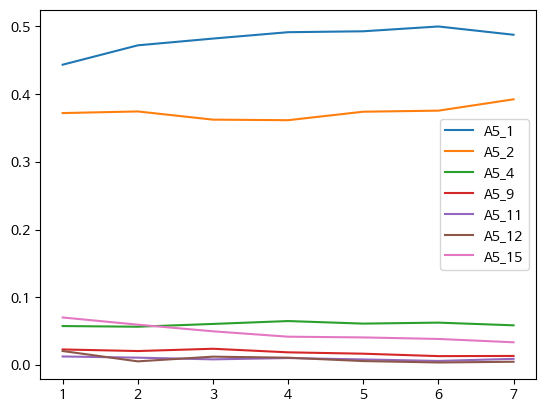

In [ ]:
counts=travel.groupby('BAGE').sum()
counts_total=counts['A5_1']+counts['A5_2']+counts['A5_4']+counts['A5_9']+counts['A5_11']+counts['A5_12']+counts['A5_15']

plt.plot(counts['A5_1']/counts_total, label='A5_1')
plt.plot(counts['A5_2']/counts_total, label='A5_2')
plt.plot(counts['A5_4']/counts_total, label='A5_4')
plt.plot(counts['A5_9']/counts_total, label='A5_9')
plt.plot(counts['A5_11']/counts_total, label='A5_11')
plt.plot(counts['A5_12']/counts_total, label='A5_12')
plt.plot(counts['A5_15']/counts_total, label='A5_15')
plt.legend()

자연 및 풍경감상의 경우 나이대에 따라 점차 증가하는 추세를 보이고,   
음식관광은 중년층에서 활동 빈도가 적지만 청년층과 노년층에서 증가하는 것을 볼 수 있음.  
그 외에 다른 요소들은 나이에 따른 큰 변화가 보이지 않음.  

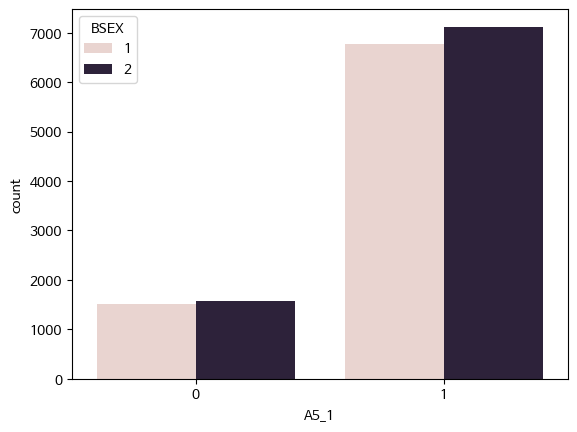

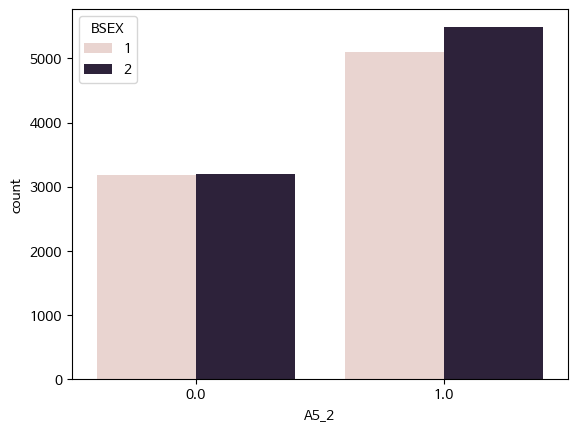

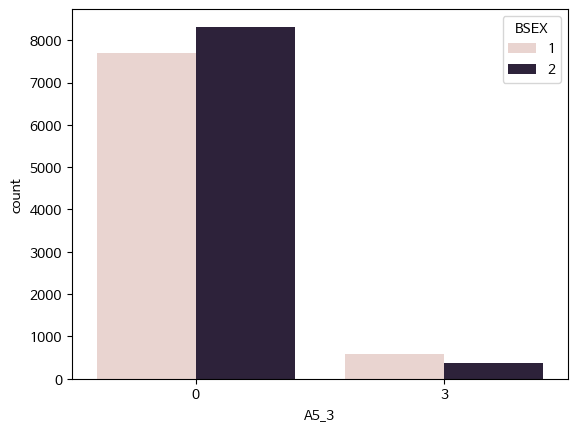

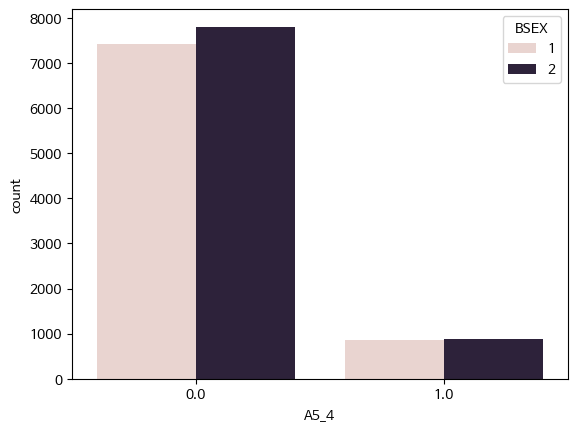

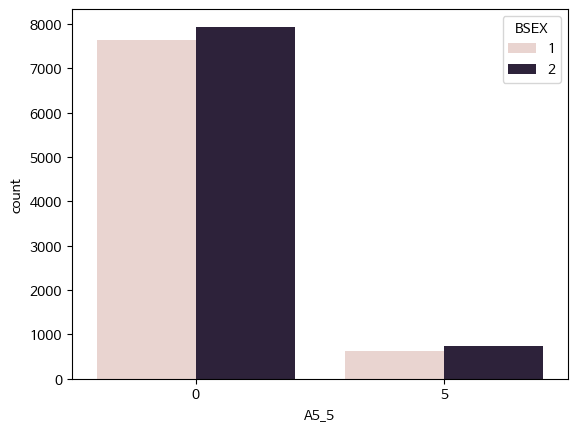

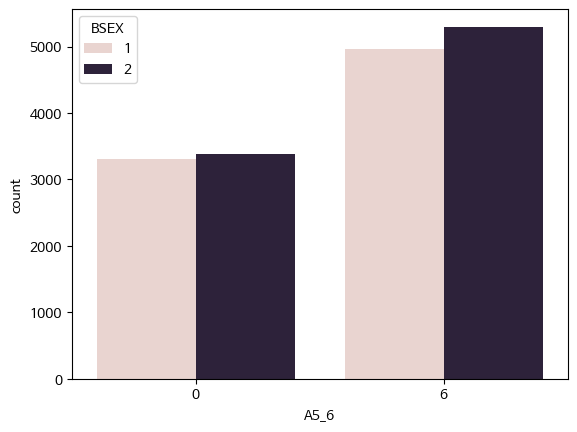

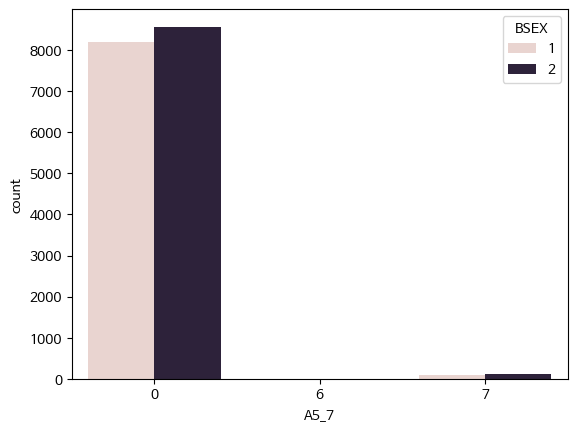

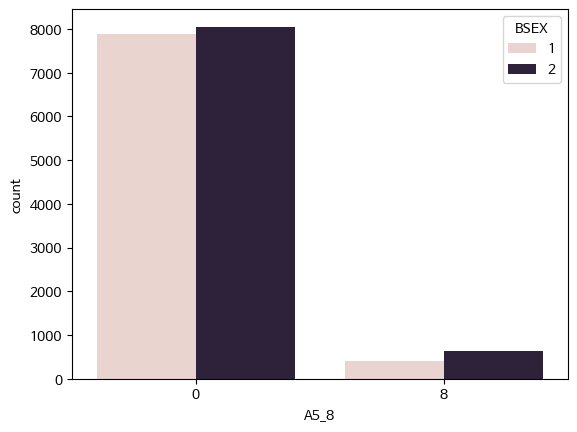

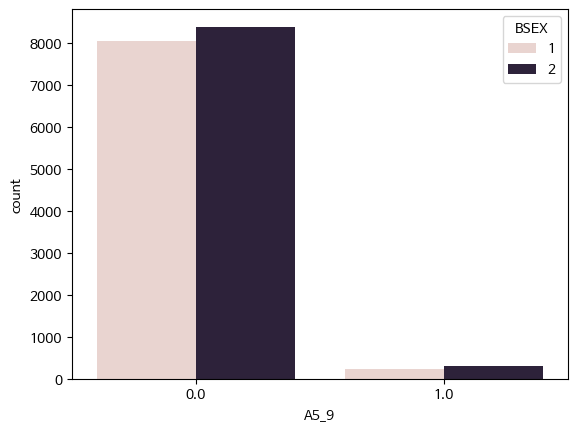

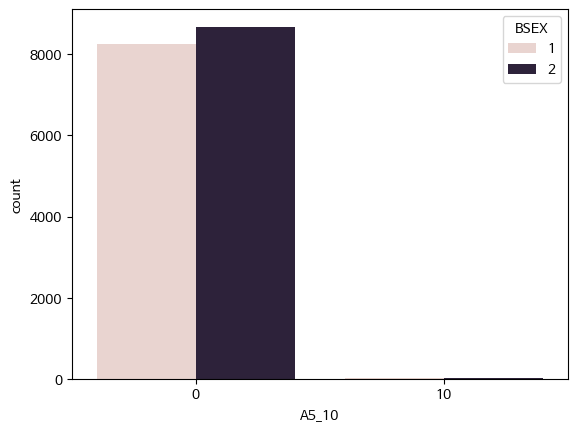

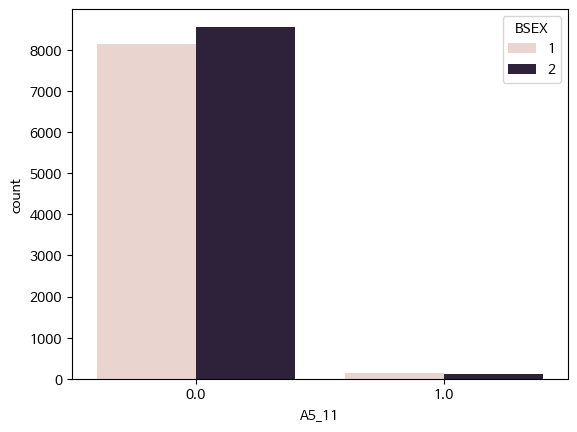

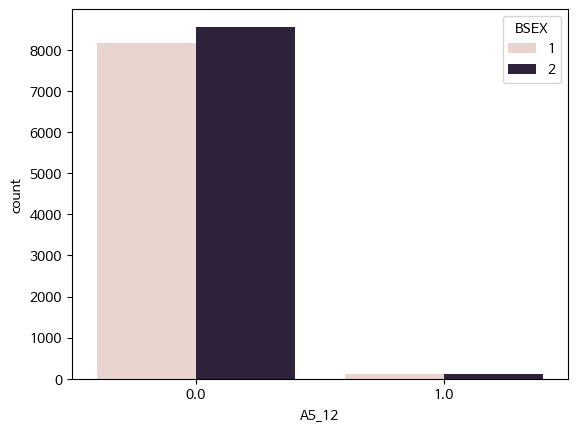

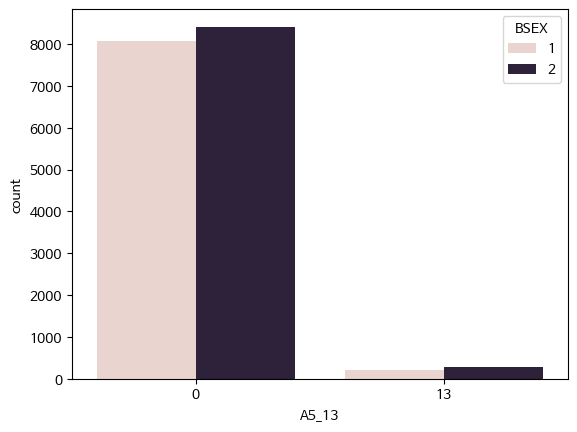

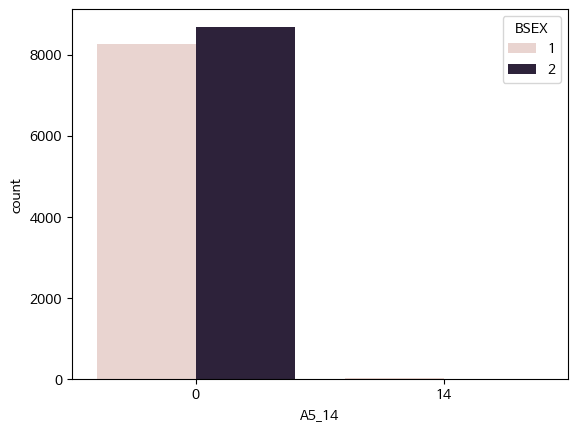

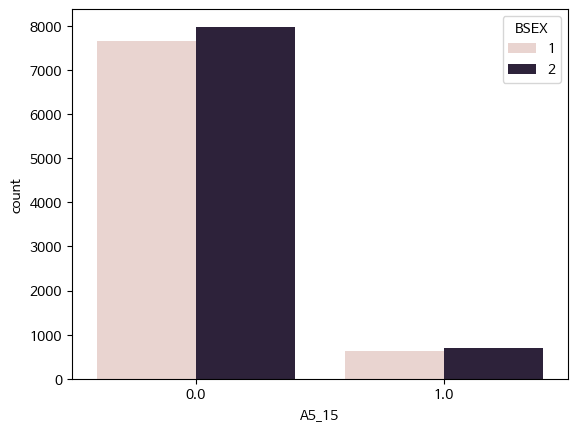

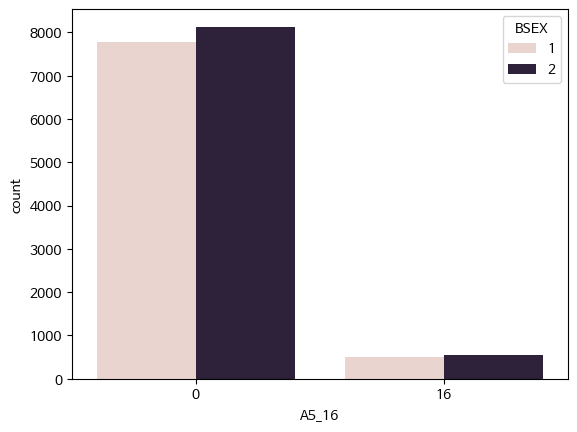

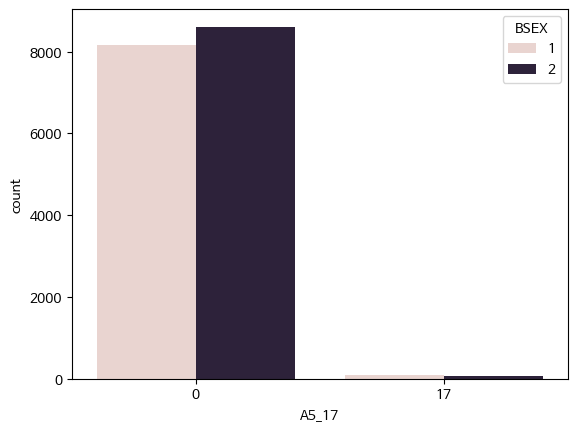

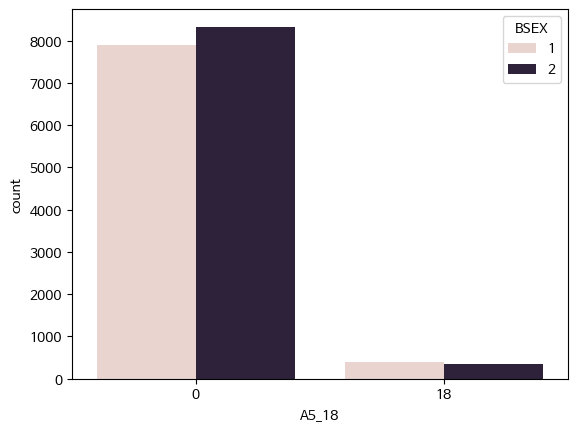

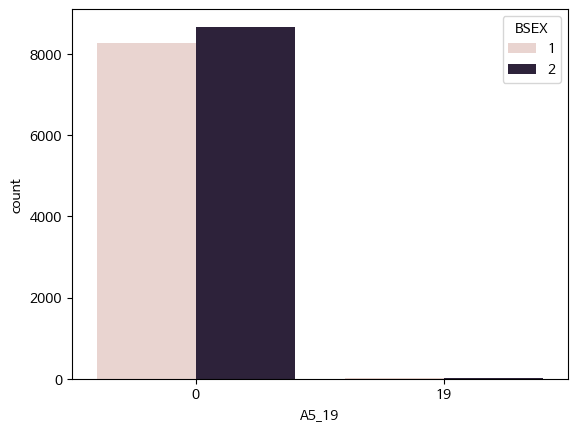

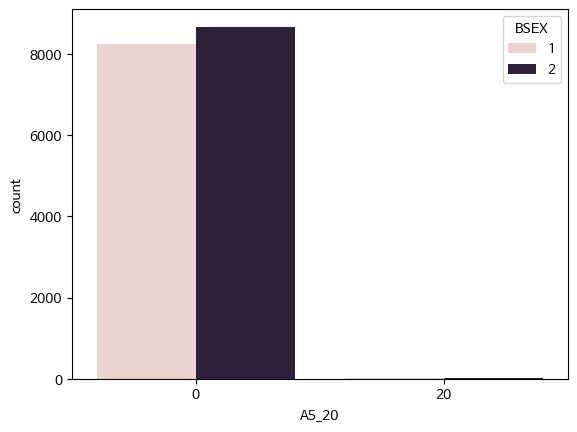

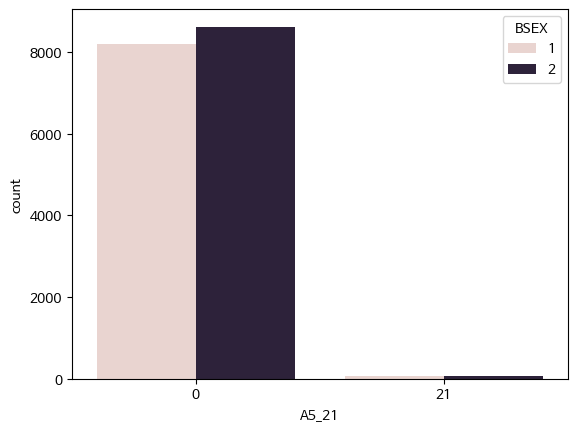

In [ ]:
for i in range(21):
  col_name = "A5_" + str(i+1)
  sns.countplot(x=col_name, data=travel, hue="BSEX")
  plt.show()

나이에 따른 국내 여행활동 여부의 차이를 확인,  
국내 여행활동 여부에 따라서 그래프의 양상이 다르게 나타나지 않음 -> 차이 없음

성별에 따른 국내 여행 활동

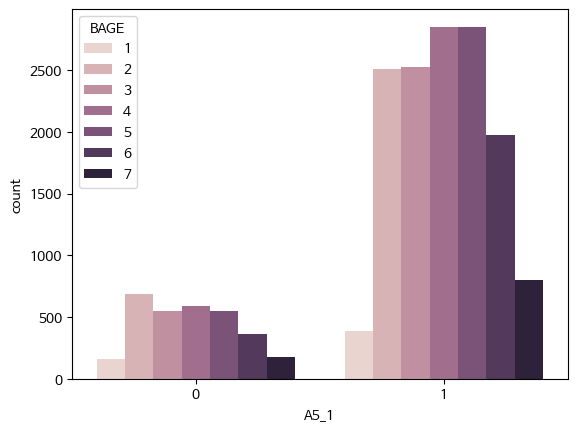

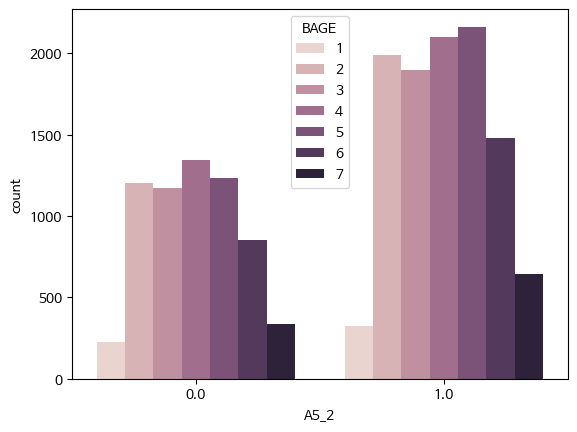

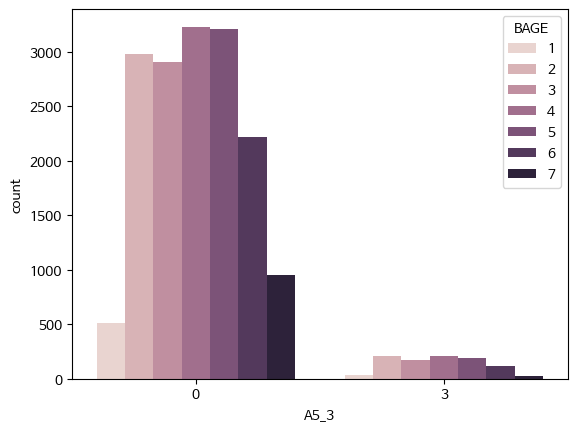

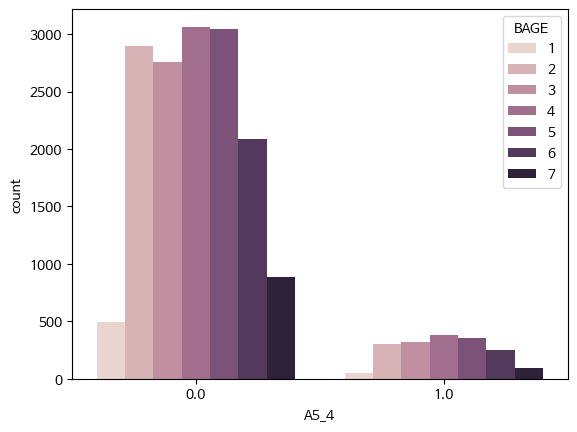

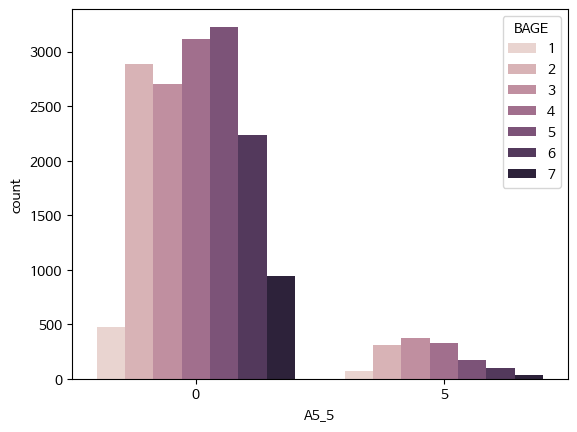

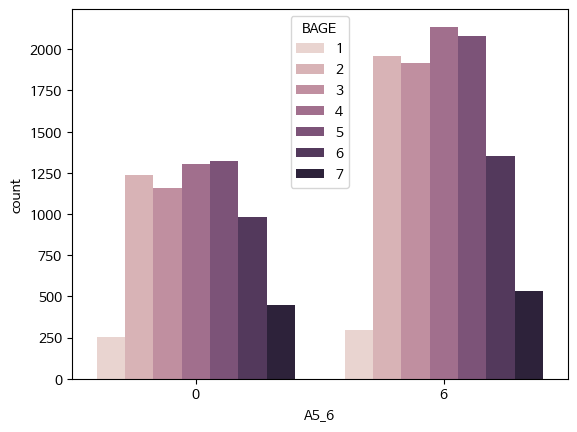

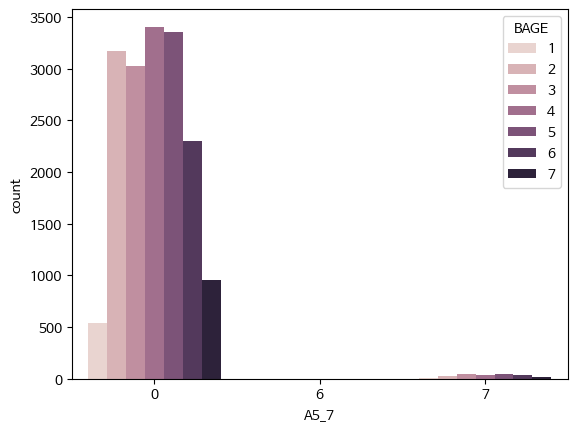

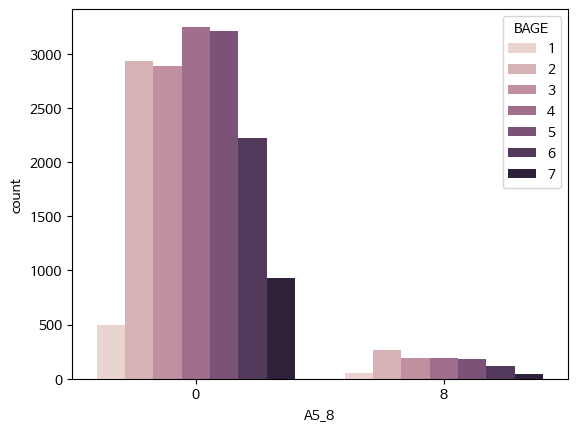

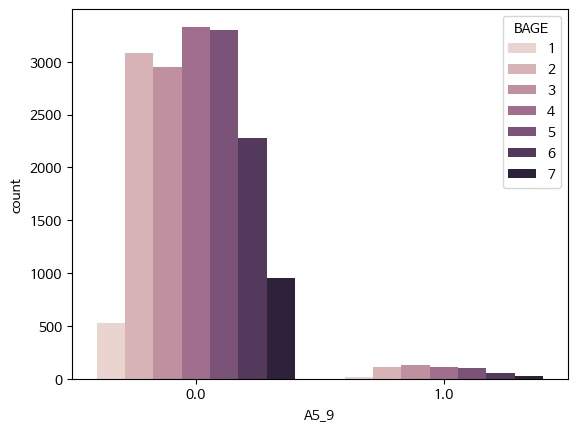

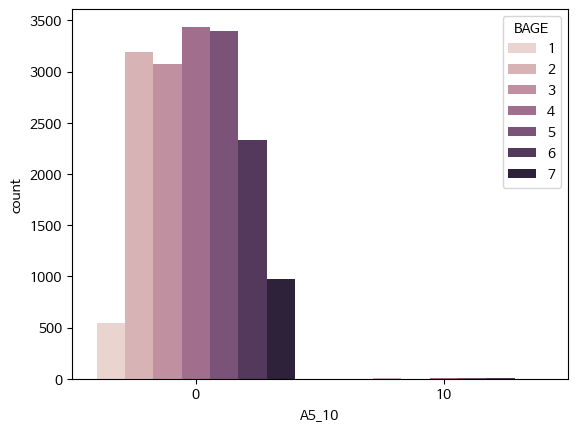

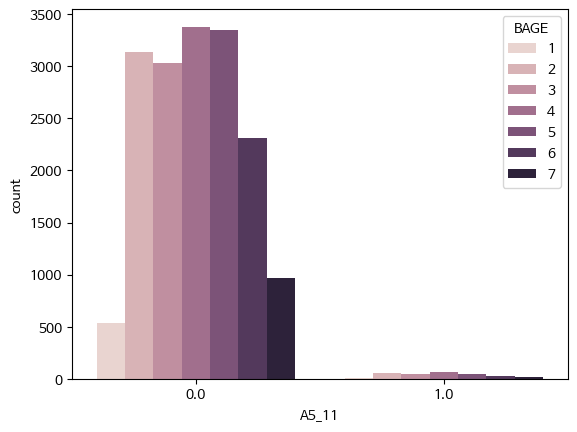

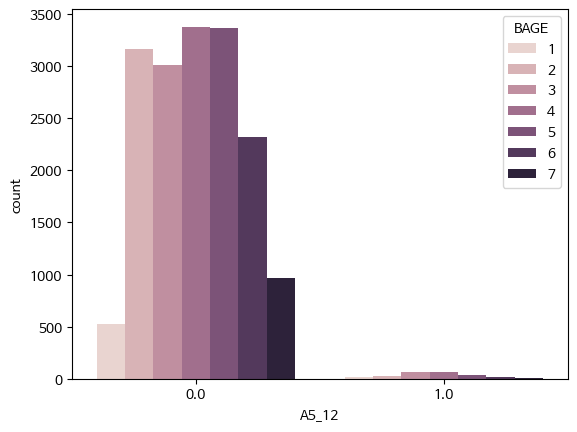

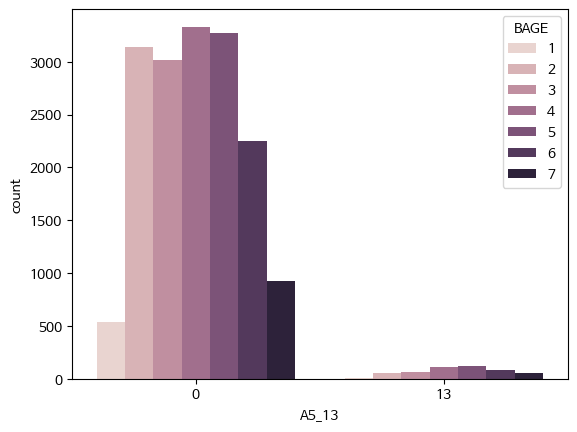

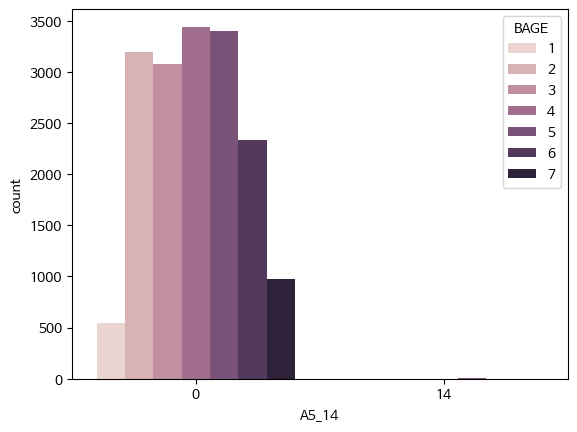

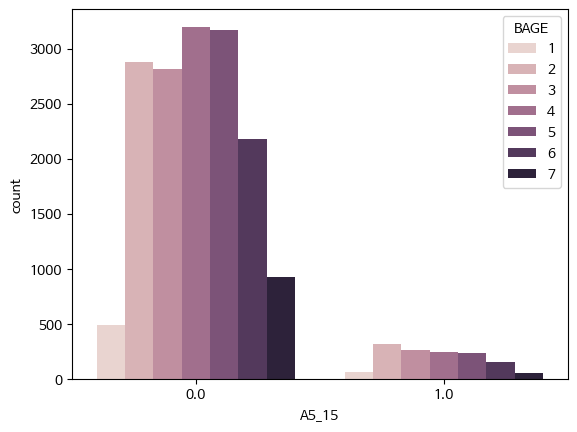

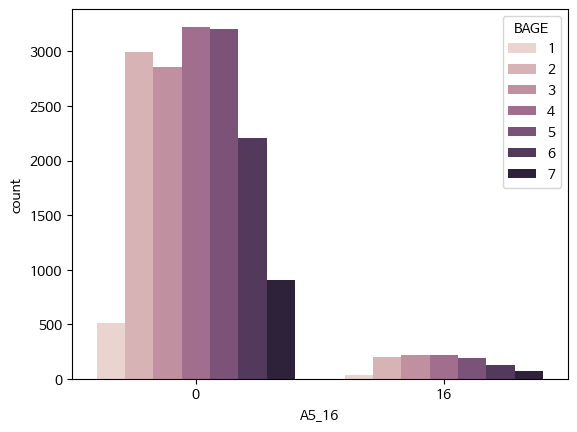

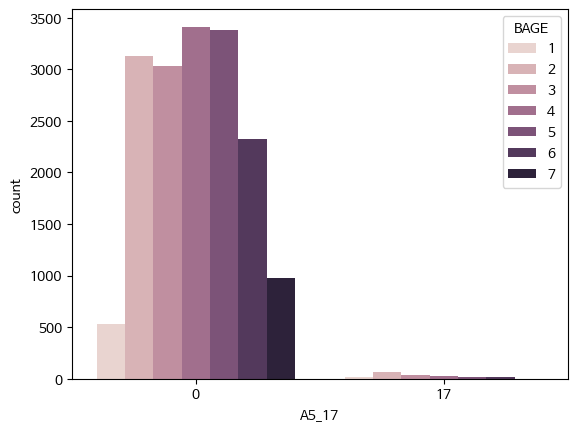

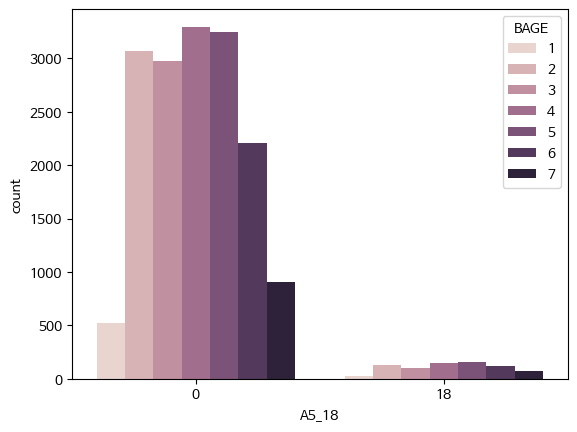

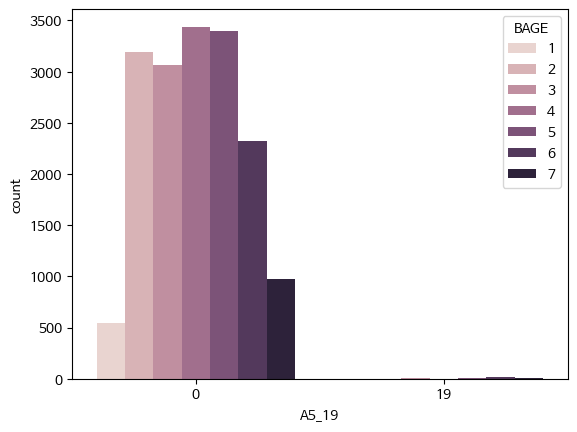

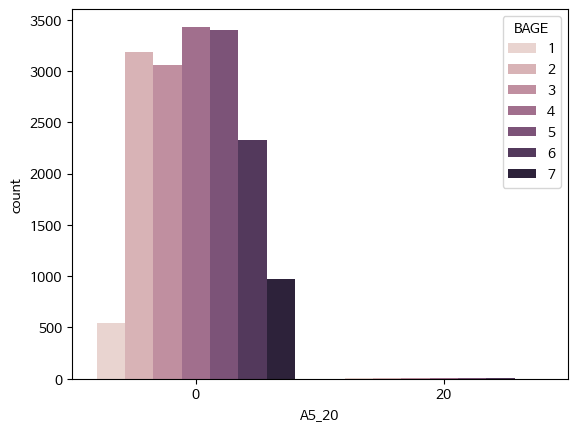

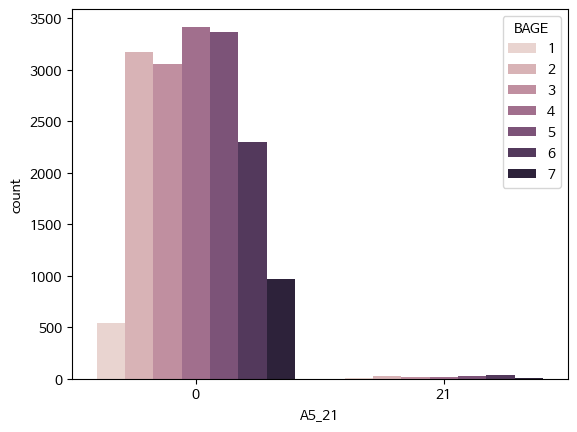

In [ ]:
for i in range(21):
  col_name = "A5_" + str(i+1)
  sns.countplot(x=col_name, data=travel, hue="BAGE")
  plt.show()

대부분 성별에 의한 차이는 없었다.

## 여행지 선택 이유 1, 2, 3순위

1. 여행지 지명도
2. 볼거리 제공
3. 저렴한 여행경비
4. 이동거리
5. 여행할 수 있는 시간
6. 숙박시설
7. 쇼핑
8. 음식
9. 교통편
10. 체험프로그램 유무
11. 경험자의 추천
12. 관광지 편의시설
13. 교육성(교육적 측면)
14. 여행 동반자 유형
15. 기타

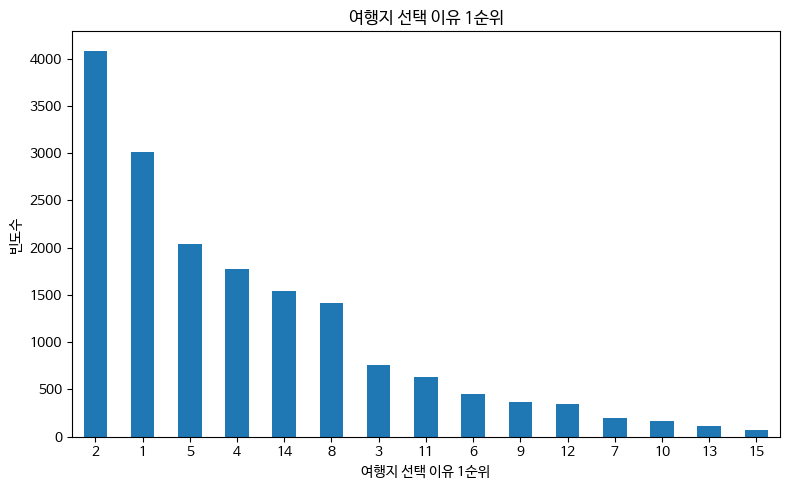

In [ ]:
# 여행지 선택 이유 1순위 빈도수 그래프
# 0으로 기입된 값 제외
travel_visual=travel[travel['A4_1']>0]
category_counts = travel_visual['A4_1'].value_counts()

# 빈도수 그래프 그리기
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar')
plt.title('여행지 선택 이유 1순위')
plt.xlabel('여행지 선택 이유 1순위')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.tight_layout()

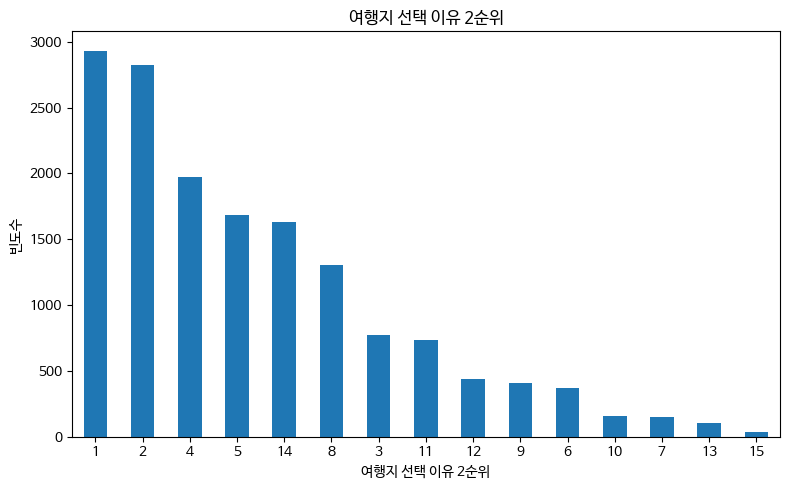

In [ ]:
# 여행지 선택 이유 2순위 빈도수 그래프
# 0으로 기입된 값 제외
travel_visual=travel[travel['A4_2']>0]
category_counts = travel_visual['A4_2'].value_counts()

# 빈도수 그래프 그리기
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar')
plt.title('여행지 선택 이유 2순위')
plt.xlabel('여행지 선택 이유 2순위')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.tight_layout()

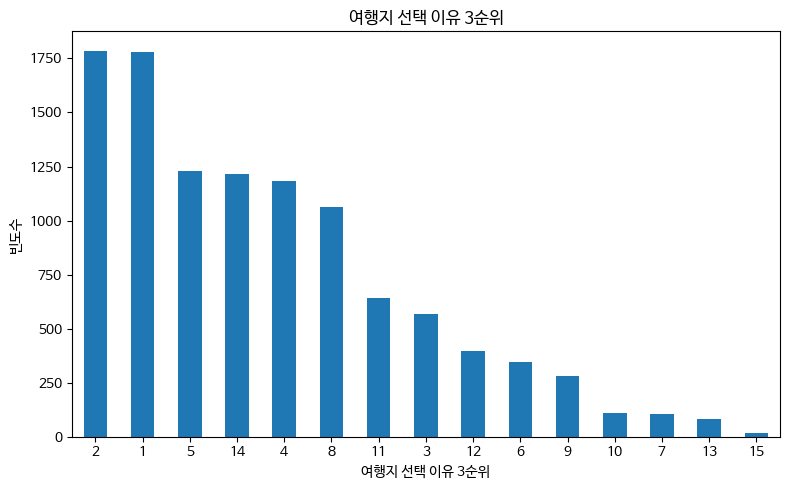

In [ ]:
# 여행지 선택 이유 3순위 빈도수 그래프
# 0으로 기입된 값 제외
travel_visual=travel[travel['A4_3']>0]
category_counts = travel_visual['A4_3'].value_counts()

# 빈도수 그래프 그리기
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar')
plt.title('여행지 선택 이유 3순위')
plt.xlabel('여행지 선택 이유 3순위')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.tight_layout()

[여행지 선택 이유 1, 2, 3순위]  

-> 볼거리 제공, 여행지 지명도, 여행할 수 있는 시간, 이동거리 등이 제일 주된 이유


## 주요 교통이동수단 1, 2, 3순위

1. 자가용
2. 철도
3. 항공기
4. 선박/해상 교통
5. 지하철
6. [정기] 고속/시외/시내버스
7. [부정기] 전세/관광버스
8. 차량대여/렌트
9. 자전거
10. 택시
11. 기타

주요 교통이동수단 1, 2, 3순위 빈도수

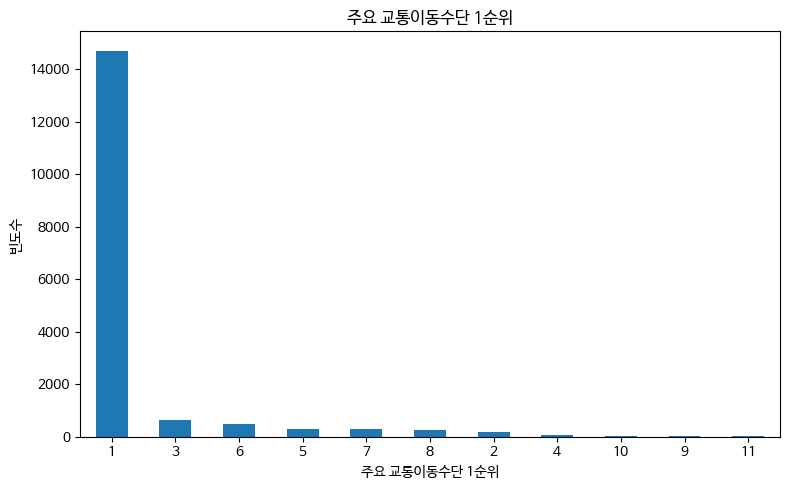

In [ ]:
# 주요 교통이동수단 1순위 빈도수 그래프
# 0으로 기입된 값 제외
travel_visual=travel[travel['A1_1']>0]
category_counts = travel_visual['A1_1'].value_counts()

# 빈도수 그래프 그리기
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar')
plt.title('주요 교통이동수단 1순위')
plt.xlabel('주요 교통이동수단 1순위')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.tight_layout()

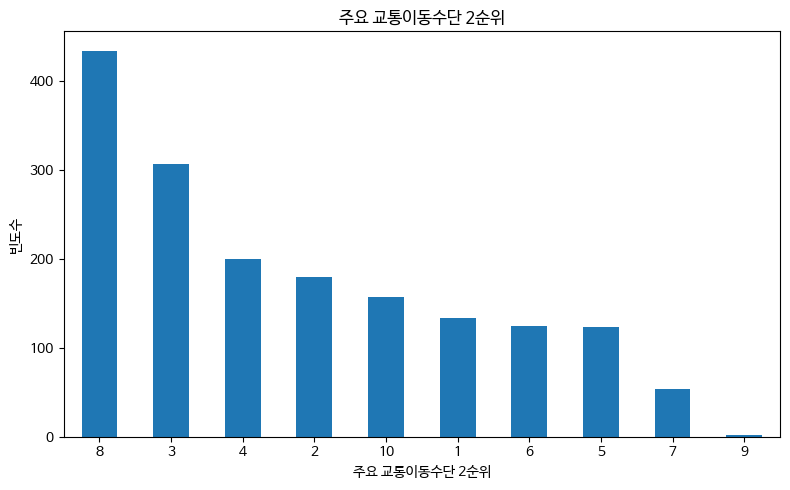

In [ ]:
# 주요 교통이동수단 2순위 빈도수 그래프
# 0으로 기입된 값 제외
travel_visual=travel[travel['A1_2']>0]
category_counts = travel_visual['A1_2'].value_counts()

# 빈도수 그래프 그리기
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar')
plt.title('주요 교통이동수단 2순위')
plt.xlabel('주요 교통이동수단 2순위')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.tight_layout()

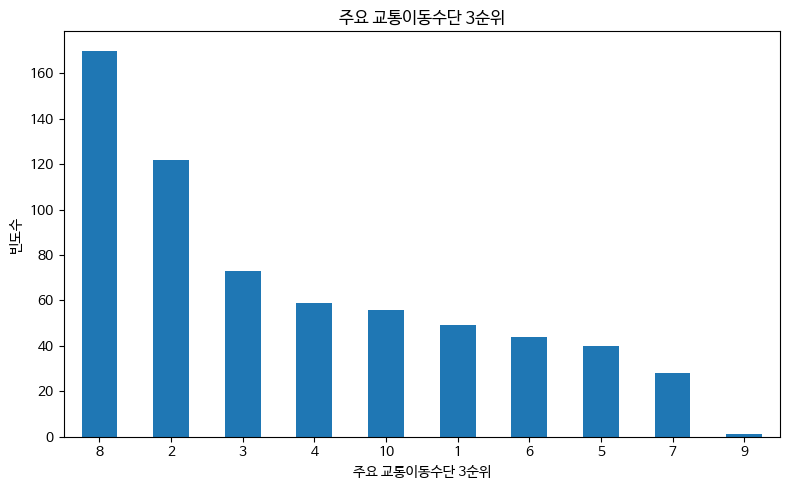

In [ ]:
# 주요 교통이동수단 3순위 빈도수 그래프
# 0으로 기입된 값 제외
travel_visual=travel[travel['A1_3']>0]
category_counts = travel_visual['A1_3'].value_counts()

# 빈도수 그래프 그리기
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar')
plt.title('주요 교통이동수단 3순위')
plt.xlabel('주요 교통이동수단 3순위')
plt.ylabel('빈도수')
plt.xticks(rotation=0)
plt.tight_layout()

[주요 교통이동수단 1, 2, 3순위 빈도수]  
1순위는 자가용, 그 다음이 항공기, 버스  
2순위는 렌트, 항공기, 선박, 철도, 택시  
3순위는 렌트, 철도, 항공기, 선박/해상, 택시  
등 생각보다 뚜벅이 여행객이 적어보이는 것을 확인 가능  

연령대별 주요 교통이동수단 1, 2, 3순위

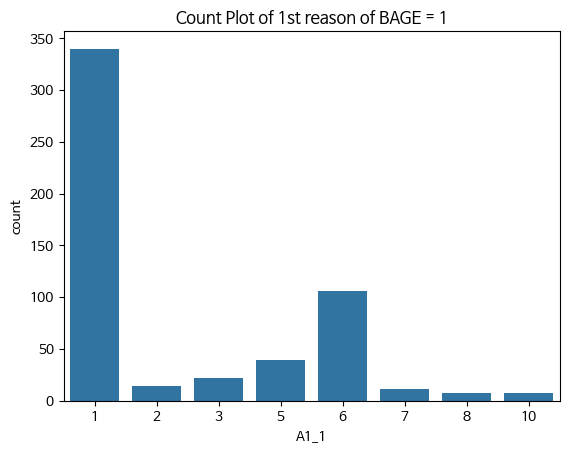

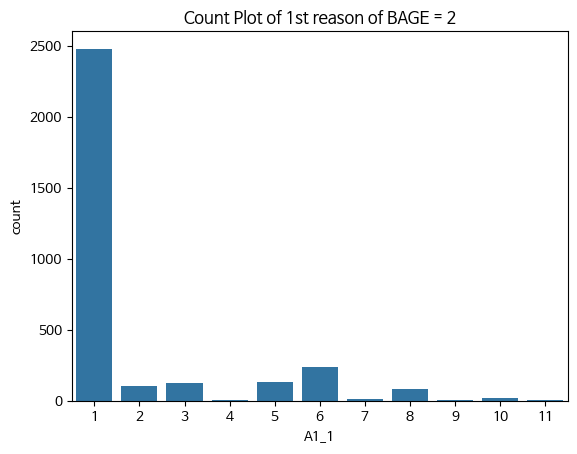

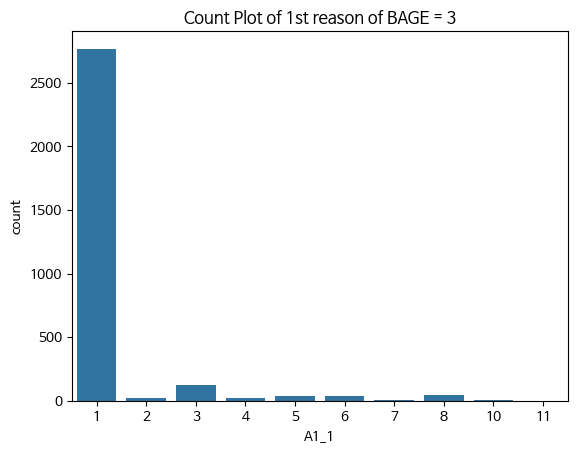

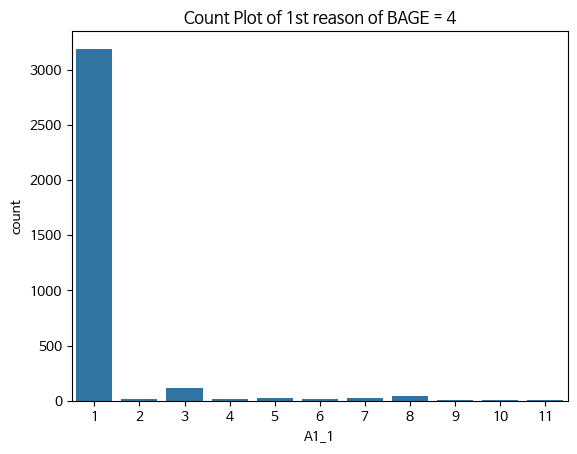

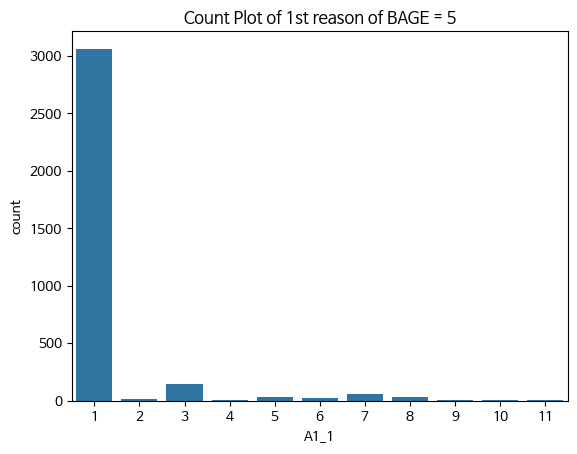

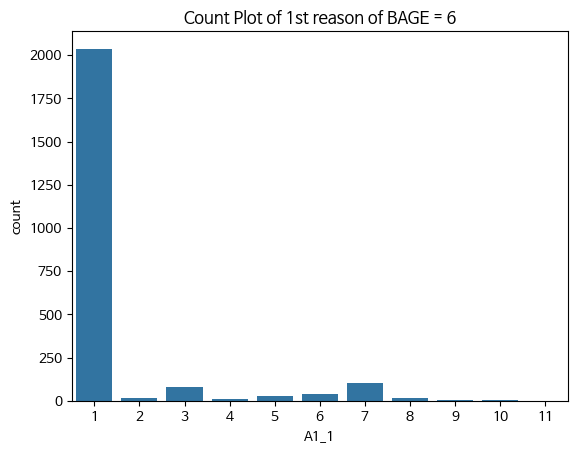

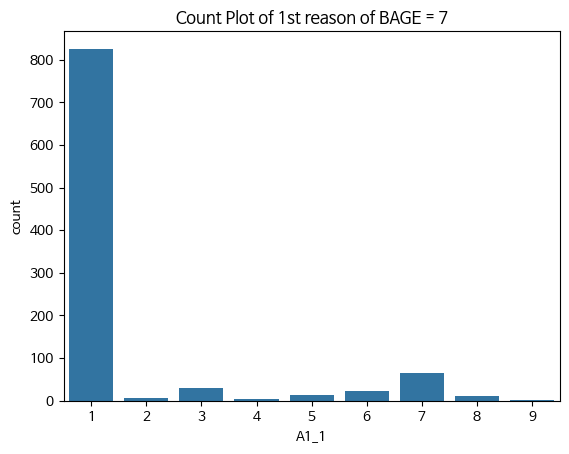

In [ ]:
# 연령대별 주요 교통이동수단 1순위
import seaborn as sns
travel_visual=travel[travel['A1_1']>0]
for i in range(7):
  j = i+1
  sns.countplot(x='A1_1', data=travel_visual[travel_visual['BAGE']==j])
  plt.title("Count Plot of 1st reason of BAGE = {}".format(j))
  plt.show()

[연령대별 주요 교통수단 1순위]  
청소년의 경우 다른 연령대와 달리 고속/시외/시내버스의 비율이 꽤 높게 나타남.  
그 외엔 모두 자가용이 1순위고 그 외에는 큰 차이를 보이지 않음.

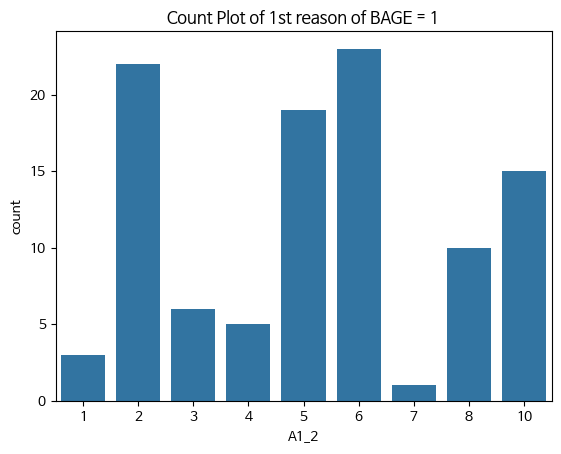

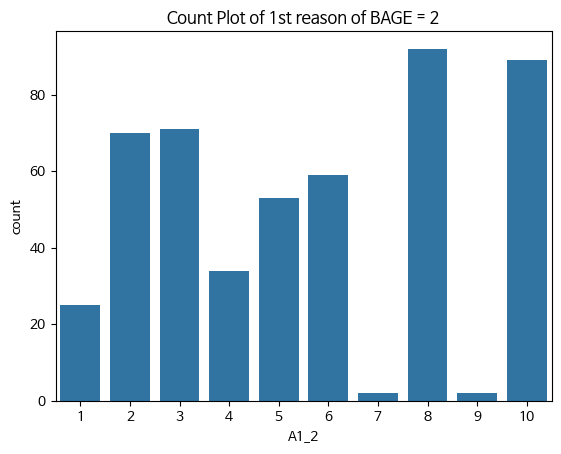

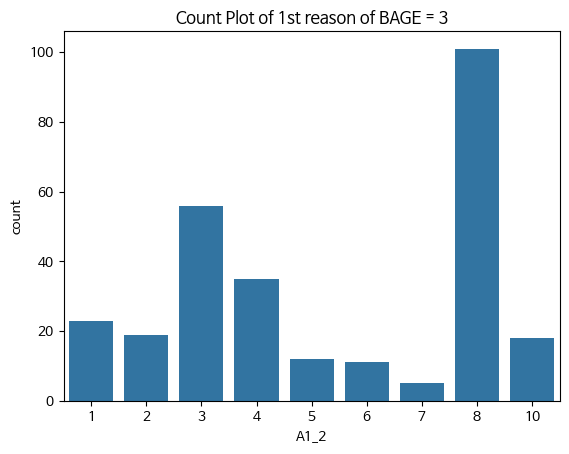

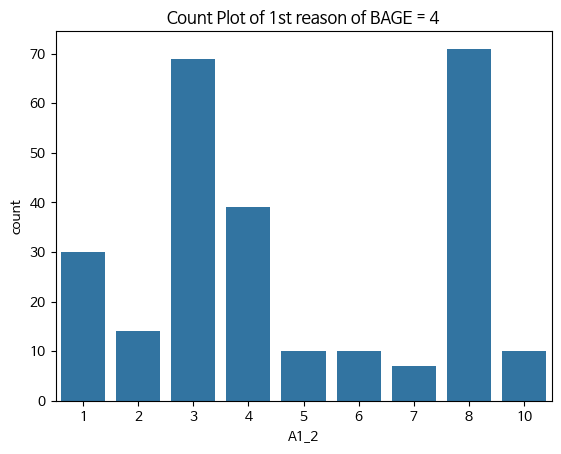

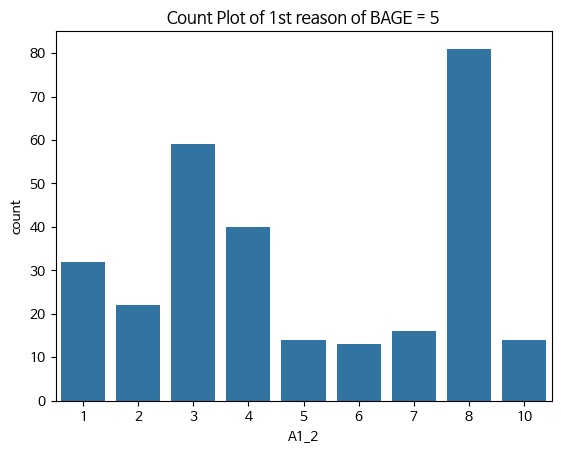

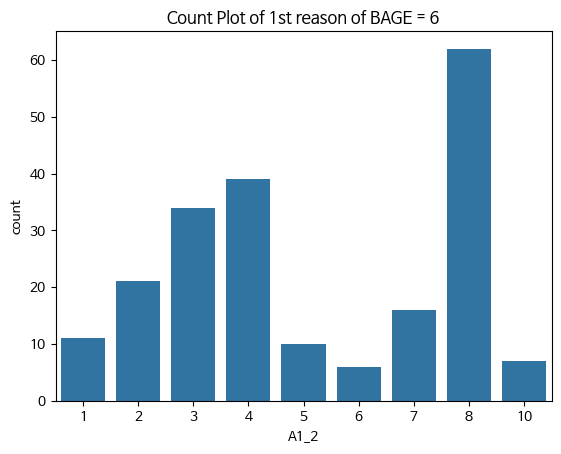

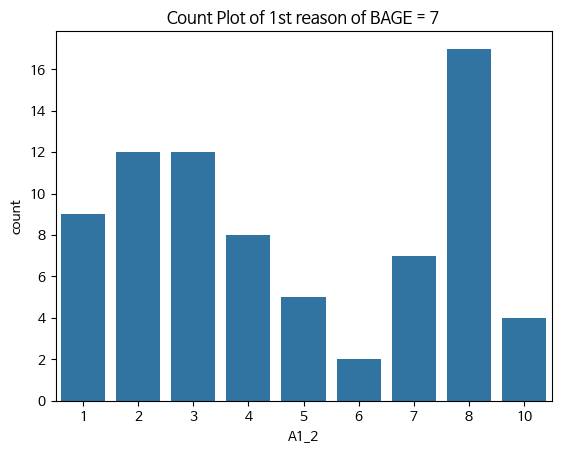

In [ ]:
# 연령대별 주요 교통이동수단 2순위
import seaborn as sns
travel_visual=travel[travel['A1_2']>0]
for i in range(7):
  j = i+1
  sns.countplot(x='A1_2', data=travel_visual[travel_visual['BAGE']==j])
  plt.title("Count Plot of 1st reason of BAGE = {}".format(j))
  plt.show()

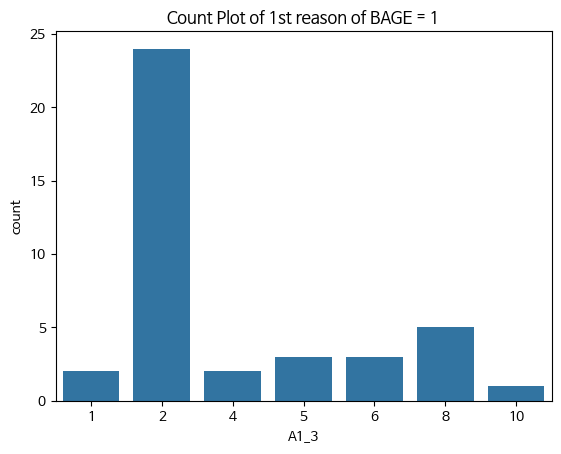

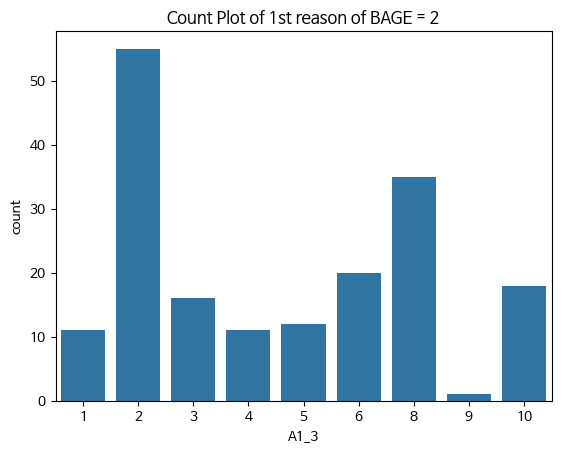

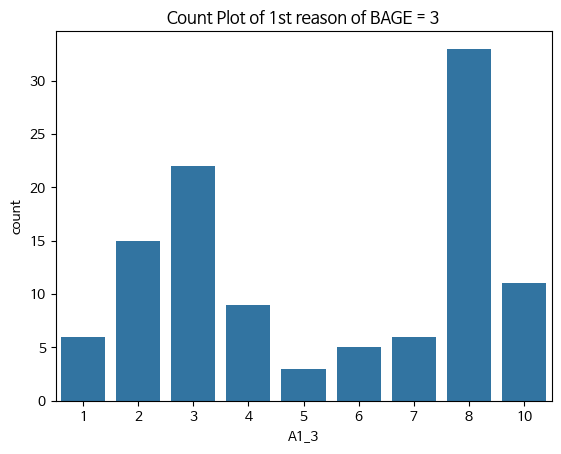

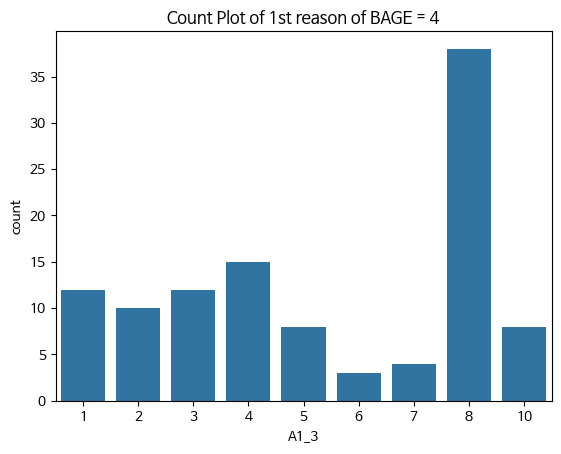

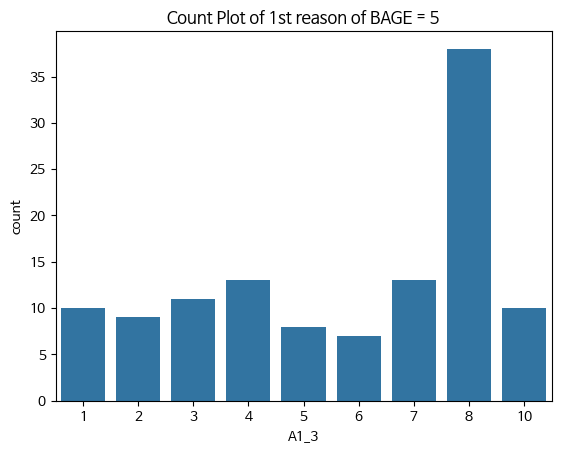

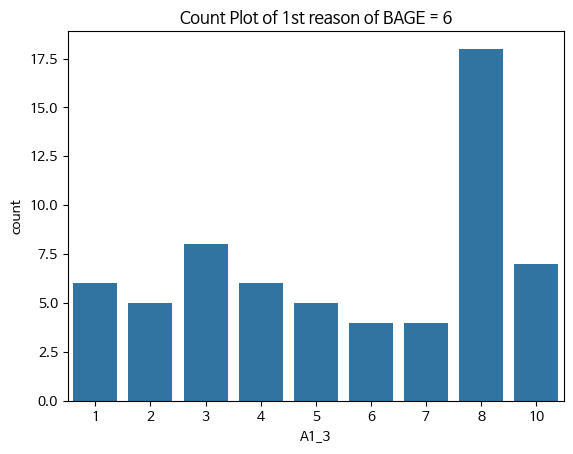

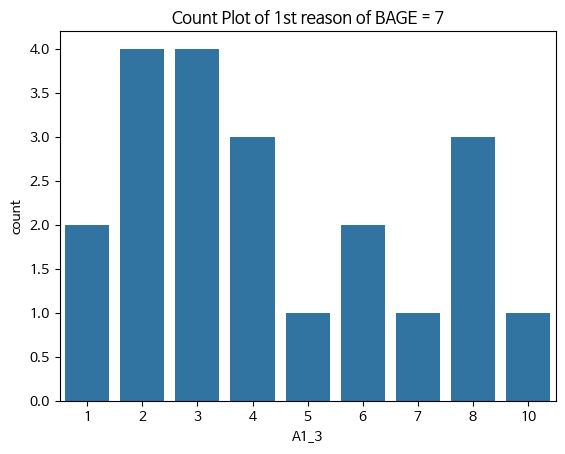

In [ ]:
# 연령대별 주요 교통이동수단 3순위
import seaborn as sns
travel_visual=travel[travel['A1_3']>0]
for i in range(7):
  j = i+1
  sns.countplot(x='A1_3', data=travel_visual[travel_visual['BAGE']==j])
  plt.title("Count Plot of 1st reason of BAGE = {}".format(j))
  plt.show()

# travel 데이터에서 여행 활동 top_10, bottom_10 뽑기

In [ ]:
travel_df=travel.copy()

travel_activity=travel_df.groupby('D_TRA1_1_SPOT')[['A5_1', 'A5_2', 'A5_4', 'A5_9', 'A5_11', 'A5_12', 'A5_15']].sum() ## A5_1이 다수여서 제외하고 싶으면 여기서 제외
travel_activity['sum']=travel_activity.sum(axis=1)
travel_activity.sort_values(by='sum', ascending=False)

,A5_1,A5_2,A5_4,A5_9,A5_11,A5_12,A5_15,sum
D_TRA1_1_SPOT,,,,,,,,
39010,515,397.0,83.0,59.0,19.0,13.0,104.0,1190.0
39020,456,357.0,71.0,43.0,12.0,14.0,89.0,1042.0
37020,403,274.0,231.0,19.0,0.0,5.0,50.0,982.0
32030,444,381.0,42.0,23.0,6.0,4.0,80.0,980.0
36020,377,322.0,48.0,20.0,6.0,4.0,82.0,859.0
...,...,...,...,...,...,...,...,...
23030,1,0.0,0.0,1.0,0.0,0.0,0.0,2.0
11090,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11070,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 상위 10개, 하위 10개 지역 추출
top_10 = travel_activity.sort_values(by='sum', ascending=False).head(10)
bottom_10 = travel_activity.sort_values(by='sum').head(10)
top_10

,A5_1,A5_2,A5_4,A5_9,A5_11,A5_12,A5_15,sum
D_TRA1_1_SPOT,,,,,,,,
39010,515,397.0,83.0,59.0,19.0,13.0,104.0,1190.0
39020,456,357.0,71.0,43.0,12.0,14.0,89.0,1042.0
37020,403,274.0,231.0,19.0,0.0,5.0,50.0,982.0
32030,444,381.0,42.0,23.0,6.0,4.0,80.0,980.0
36020,377,322.0,48.0,20.0,6.0,4.0,82.0,859.0
32060,326,270.0,29.0,3.0,2.0,1.0,46.0,677.0
21090,298,247.0,12.0,11.0,8.0,4.0,53.0,633.0
34030,312,257.0,15.0,3.0,14.0,7.0,12.0,620.0
37010,250,221.0,19.0,3.0,3.0,0.0,17.0,513.0


상위 10개 추출
* 39010 : 제주특별자치도 제주시
* 39020 : 제주특별자치도 서귀포시
* 37020 : 경상북도 경주시
* 32030 : 강원도 강릉시
* 36020 : 전라남도 여수시
* 32060 : 강원도 속초시
* 21090 : 부산광역시 해운대구
* 34030 : 충청남도 보령시
* 37010 : 경상북도 포항시
* 35010 : 전라북도 전주시

In [ ]:
bottom_10

,A5_1,A5_2,A5_4,A5_9,A5_11,A5_12,A5_15,sum
D_TRA1_1_SPOT,,,,,,,,
11180,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11070,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11150,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11090,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
21150,1,1.0,0.0,0.0,0.0,0.0,0.0,2.0
21080,1,1.0,0.0,0.0,0.0,0.0,0.0,2.0
23030,1,0.0,0.0,1.0,0.0,0.0,0.0,2.0
23070,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0
11170,1,2.0,0.0,0.0,0.0,0.0,0.0,3.0


하위 10개 추출
* 11180 : 서울특별시 금천구
* 11070 : 서울특별시 중랑구
* 11150 : 서울특별시 양천구
* 11090 : 서울특별시 강북구
* 21150 : 부산광역시 사상구
* 21080 : 부산광역시 북구
* 23030 : 인천광역시 남구
* 23070 : 인천광역시 계양구
* 11170 : 서울특별시 구로구
* 22030 : 대구광역시 서구

# 지역축제/행사 데이터 불러오기
* festival 데이터

In [ ]:
import pandas as pd
festival = pd.read_csv("/content/festival.csv")
festival.head()

,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,LEGALDONG_NM,ADSTRD_NM,RDNMADR_NM,OPMTN_PLACE_NM,FSTVL_BEGIN_DE,FSTVL_END_DE,FSTVL_CN,MNNST_NM,AUSPC_INSTT_NM,PROVD_INSTT_NM,ORIGIN_NM,PROVD_INSTT_NM.1,ORIGIN_NM.1
0,춘천연극제,강원도,춘천시,옥천동,소양동,강원도 춘천시 서부대성로 71,봄내극장+석사천,2022-06-15,2022-10-29,코미디경연작+초청작+소소연극제+가족극+살롱연극+거리공연,(사)춘천연극제,(사)춘천연극제,강원도 춘천시,문화체육관광부,강원도 춘천시,문화체육관광부
1,제34회 춘천인형극제,강원도,춘천시,사농동,신사우동,강원도 춘천시 영서로 3017,춘천인형극장+축제극장몸짓,2022-04-04,2022-12-25,국내외 인형극 공연 관람+경연대회+퍼레이드,(재)춘천인형극제,강원도 춘천시청+(재)춘천인형극제,강원도 춘천시,문화체육관광부,강원도 춘천시,문화체육관광부
2,인형극아카데미,강원도,춘천시,사농동,신사우동,강원도 춘천시 영서로 3017,춘천인형극장,2022-03-01,2022-05-31,찾아가는 인형극 공연+국내외 초청작 인형극 공연+커튼콜 개최(온라인공연 인기작 3팀...,(재)춘천인형극제,강원도 춘천시청+(재)춘천인형극제,강원도 춘천시,문화체육관광부,강원도 춘천시,문화체육관광부
3,마임아카데미,강원도,춘천시,효자동,효자1동,강원도 춘천시 춘천로 112,축제극장 몸짓+춘천공연예술연습공간,2022-03-29,2022-11-30,몸짓배우+시민배우+청년기획자 과정,(사)춘천마임축제,(사)춘천마임축제,강원도 춘천시,문화체육관광부,강원도 춘천시,문화체육관광부
4,춘천마임축제,강원도,춘천시,효자동,효자1동,강원도 춘천시 춘천로 112,"명동, 공지천 의암공원+삼악산 케이블카 임시주차장",2022-05-22,2022-05-29,Rock&Rock 공연+극장공연+불의도시 도깨비난장,(사)춘천마임축제,(사)춘천마임축제,강원도 춘천시,문화체육관광부,강원도 춘천시,문화체육관광부


# festival 데이터 전처리
* festival_df 데이터 프레임
* FSTVL_BEGIN_DE : 축제 시작 날짜
* FSTVL_END_DE : 축제 종료 날짜
* 축제 기간이 2022-06-01부터 2022-08-01이면 6월, 7월, 8월에 해당하는 행을 추가로 생성함.

In [ ]:
import pandas as pd

# 날짜 데이터를 datetime 포맷으로 변환
festival['FSTVL_BEGIN_DE'] = pd.to_datetime(festival['FSTVL_BEGIN_DE'])
festival['FSTVL_END_DE'] = pd.to_datetime(festival['FSTVL_END_DE'])

# 'CTPRVN_NM'과 'SIGNGU_NM'를 합쳐서 'Region' 열 생성
festival['Region'] = festival['CTPRVN_NM'] + ' ' + festival['SIGNGU_NM']

# 축제 기간을 반영하기 위해 기간을 월별로 끊어서 행 개수 확장
def expand_by_month(df):
    rows = []
    for _, row in df.iterrows():
        start_date = row['FSTVL_BEGIN_DE']
        end_date = row['FSTVL_END_DE']
        date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
        for date in date_range:
            new_row = row.copy()
            new_row['YearMonth'] = date.strftime('%Y-%m')
            rows.append(new_row)
    return pd.DataFrame(rows)

expanded_festival_df = expand_by_month(festival) # 함수 반영

# 월만 추출
def get_month(year_month):
    return pd.to_datetime(year_month).strftime('%m')

expanded_festival_df['Month'] = expanded_festival_df['YearMonth'].apply(get_month) # 함수 반영
expanded_festival_df = expanded_festival_df.drop(columns=['YearMonth'])

# 월별, 지역별 축제 수 열 추가
month_region_counts = expanded_festival_df.groupby(['Month', 'Region']).size().reset_index(name='FCLTY_NM_Count')
expanded_festival_df = pd.merge(expanded_festival_df, month_region_counts, on=['Month', 'Region'], how='left')

# '월', '지역', '축제 수'만 추출
festival_df = expanded_festival_df[['Month', 'Region', 'FCLTY_NM_Count']].drop_duplicates()

# Month 열을 정수로 변환
festival_df['Month']=festival_df['Month'].astype(int)

# 계절 열 생성
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 4
    elif month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    elif month in [9, 10, 11]:
        return 3

festival_df['Season'] = festival_df['Month'].apply(map_month_to_season) # 함수 반영

festival_df

,Month,Region,FCLTY_NM_Count,Season
0,7,강원도 춘천시,3,2
1,8,강원도 춘천시,3,2
2,9,강원도 춘천시,3,3
3,10,강원도 춘천시,3,3
4,5,강원도 춘천시,3,1
...,...,...,...,...
530,2,강원도 화천군,1,4
531,4,전라남도 영암군,1,1
535,10,전라북도 김제시,1,3
538,10,경기도 부천시,1,3


# festival 시각화

In [ ]:
import plotly.express as px
import pandas as pd
color = 'rgba(255, 0, 0, 0.3)'
# Gantt Chart 만들기
fig = px.timeline(festival, x_start="FSTVL_BEGIN_DE", x_end="FSTVL_END_DE", y='CTPRVN_NM', opacity = 0.4)

# 위에서부터 시작하게 Y축 역방향으로 설정
fig.update_yaxes(autorange="reversed")
fig.update_xaxes(range=["2020-01-01", "2024-12-31"])
fig.show()

[2020-2024년 축제 일자별 시각화]  
데이터 수집 시기에 의해 대부분 2022년에 몰려있음.

In [ ]:
import plotly.express as px
import pandas as pd
color = 'rgba(255, 0, 0, 0.3)'
# Gantt Chart 만들기
fig = px.timeline(festival, x_start="FSTVL_BEGIN_DE", x_end="FSTVL_END_DE", y='CTPRVN_NM', opacity = 0.4)

# 위에서부터 시작하게 Y축 역방향으로 설정
fig.update_yaxes(autorange="reversed")
fig.update_xaxes(range=["2022-01-01", "2022-12-31"])
fig.show()

[2022년 축제 일자별 시각화]  
축제가 대부분 10-11월에 몰려 있는 것을 확인 가능  
전라남도, 충청남도의 축제가 많은 편이다.

# 군집화_ver.1
* Month, Region으로 그룹화
* 인천광역시 남구 = 인천광역시 미추홀구
* 정류장 공급도 2024-01-17부터 : 전북 전주시가 2024-01-18부로 행정명이 바뀌어서 데이터 누락

## travel 군집화 전처리

In [ ]:
# 월별, 지역별 방문자 수
visitor = travel.groupby(['D_TRA1_1_SMONTH', 'D_TRA1_1_SPOT'])['ID'].nunique().reset_index(name='Visitor_Count')
visitor = visitor.rename(columns={'D_TRA1_1_SMONTH': 'Month', 'D_TRA1_1_SPOT': 'Region'})

# 선별 여행 활동 비율
## 값이 각각 2, 4, 9, 11, 12, 15로 되어있으므로 모두 1로 변환
columns_to_adjust = ['A5_2', 'A5_4', 'A5_9', 'A5_11', 'A5_12', 'A5_15'] ## 'A5_1' 제외
for col in columns_to_adjust:
    travel[col] = travel[col].apply(lambda x: 1 if x > 0 else 0)

## 선별 여행 활동 칼럼에 1이 있으면 1, 없으면 0인 열 생성
travel['Any_Activity'] = travel[columns_to_adjust].max(axis=1)

## 월별, 지역별 선별 여행 활동 개수 데이터 프레임 생성
activity_count=travel.groupby(['D_TRA1_1_SMONTH', 'D_TRA1_1_SPOT'])['Any_Activity'].sum().reset_index(name='Active_Visitor_Count')
activity_count = activity_count.rename(columns={'D_TRA1_1_SMONTH': 'Month', 'D_TRA1_1_SPOT': 'Region'})

## 선별 여행 활동 비율 열 생성
activity_count['Activity_Ratio'] = activity_count['Active_Visitor_Count'] / visitor['Visitor_Count']

# 선별 활동 지출 비용의 평균, 선별 교통수단 지출 비용의 평균
## 선별 활동 지출 비용의 합 열 생성
travel['Activity_Exp'] = travel['A9G_1'] + travel['A9G_2'] + travel['A9D'] + travel['A9E']
## 선별 교통수단 지출 비용의 합 열 생성
travel['Traffic_Exp'] = travel['A9F_1'] + travel['A9F_2'] + travel['A9F_3'] + travel['A9F_4']

## 월별, 지역별 선별 활동 지출 비용의 평균, 선별 교통수단 지출 비용의 평균 데이터 프레임 생성
### 월별, 지역별 선별 활동 지출 비용과 선별 교통수단 지출 비용의 총합 데이터 프레임 생성
total_expenditure = travel.groupby(['D_TRA1_1_SMONTH', 'D_TRA1_1_SPOT'])[['Activity_Exp', 'Traffic_Exp']].sum().reset_index()
total_expenditure = total_expenditure.rename(columns={'D_TRA1_1_SMONTH': 'Month', 'D_TRA1_1_SPOT': 'Region'})

### 'Visitor_Count' 값을 가져오기 위해 visitor 데이터 프레임과 병합
merged_df = total_expenditure.merge(visitor, on=['Month', 'Region'])

### 선별 활동 지출 비용의 평균, 선별 교통수단 지출 비용의 평균 열 생성
merged_df['Activity_Exp_Avg'] = merged_df['Activity_Exp'] / merged_df['Visitor_Count']
merged_df['Traffic_Exp_Avg'] = merged_df['Traffic_Exp'] / merged_df['Visitor_Count']

# 차량 보유하지 않은 방문자 비율
## 차량 보유하지 않음을 1로, 차량 보유함을 0으로 하는 NoCar 열 생성
travel['NoCar'] = travel['DQ7'].apply(lambda x: 1 if x == 2 else 0)

## 월별, 지역별로 차량 보유하지 않은 사람 수 데이터 프레임 생성
no_car_count = travel.groupby(['D_TRA1_1_SMONTH', 'D_TRA1_1_SPOT'])['NoCar'].sum().reset_index()
no_car_count = no_car_count.rename(columns={'D_TRA1_1_SMONTH': 'Month', 'D_TRA1_1_SPOT': 'Region'})

## 'Visitor_Count' 값을 가져오기 위해 merged_df 데이터 프레임과 병합
merged_df = merged_df.merge(no_car_count, on=['Month', 'Region'])

## 차량 보유하지 않은 방문자 비율 열 NoCar_Ratio 생성
merged_df['NoCar_Ratio'] = merged_df['NoCar'] / merged_df['Visitor_Count']

# 데이터 프레임 병합(1)
activity_count = pd.merge(activity_count, merged_df, on=['Month', 'Region'], how='left')

# 선별 지역에 해당하는 행만 추출
spots = [39010, 39020, 37020, 32030, 36020, 32060, 21090, 34030, 37010, 35010,
         11180, 11070, 11150, 11090, 21150, 21080, 23030, 23070, 11170, 22030]
visitor = visitor[visitor['Region'].isin(spots)]
activity_count = activity_count[activity_count['Region'].isin(spots)]

# 지역 이름 변환
spot_names = {
    39010: '제주특별자치도 제주시',
    39020: '제주특별자치도 서귀포시',
    37020: '경상북도 경주시',
    32030: '강원도 강릉시',
    36020: '전라남도 여수시',
    32060: '강원도 속초시',
    21090: '부산광역시 해운대구',
    34030: '충청남도 보령시',
    37010: '경상북도 포항시',
    35010: '전라북도 전주시',
    11180: '서울특별시 금천구',
    11070: '서울특별시 중랑구',
    11150: '서울특별시 양천구',
    11090: '서울특별시 강북구',
    21150: '부산광역시 사상구',
    21080: '부산광역시 북구',
    23030: '인천광역시 미추홀구',
    23070: '인천광역시 계양구',
    11170: '서울특별시 구로구',
    22030: '대구광역시 서구'
}
visitor['Region'] = visitor['Region'].map(spot_names)
activity_count['Region'] = activity_count['Region'].map(spot_names)

# 데이터 프레임 병합(2)
travel_filtered_df = pd.merge(visitor, activity_count, on=['Month', 'Region', 'Visitor_Count'], how='left')

# Active_Visitor_Count 열 제거
travel_filtered_df = travel_filtered_df.drop(columns=['Active_Visitor_Count', 'Activity_Exp', 'Traffic_Exp', 'NoCar'])

# 계절 열 생성
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 4
    elif month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    elif month in [9, 10, 11]:
        return 3
travel_filtered_df['Season'] = travel_filtered_df['Month'].apply(map_month_to_season) # 함수 반영
travel_filtered_df

<ipython-input-45-5be4b8e500ca>:85: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Month,Region,Visitor_Count,Activity_Ratio,Activity_Exp_Avg,Traffic_Exp_Avg,NoCar_Ratio,Season
0,1,부산광역시 해운대구,19,0.947368,171157.947368,53421.105263,0.000000,4
1,1,강원도 강릉시,49,0.857143,214071.510204,4489.795918,0.040816,4
2,1,강원도 속초시,24,0.833333,243624.833333,14041.708333,0.000000,4
3,1,충청남도 보령시,18,0.944444,145111.166667,0.000000,0.055556,4
4,1,전라북도 전주시,19,0.894737,170263.210526,0.000000,0.000000,4
...,...,...,...,...,...,...,...,...
131,12,전라남도 여수시,47,0.829787,216289.531915,2553.191489,0.042553,4
132,12,경상북도 포항시,29,0.793103,142551.689655,5517.241379,0.034483,4
133,12,경상북도 경주시,43,0.720930,119465.139535,2209.302326,0.046512,4
134,12,제주특별자치도 제주시,41,0.804878,323792.609756,229268.390244,0.121951,4


## festival 군집화 전처리 및 병합
* travel_filtered_df와 병합

In [ ]:
# 선별 지역
specific_regions = [
    "제주특별자치도 제주시",
    "제주특별자치도 서귀포시",
    "경상북도 경주시",
    "강원도 강릉시",
    "전라남도 여수시",
    "강원도 속초시",
    "부산광역시 해운대구",
    "충청남도 보령시",
    "경상북도 포항시",
    "전라북도 전주시",
    "서울특별시 금천구",
    "서울특별시 중랑구",
    "서울특별시 양천구",
    "서울특별시 강북구",
    "부산광역시 사상구",
    "부산광역시 북구",
    "인천광역시 미추홀구",
    "인천광역시 계양구",
    "서울특별시 구로구",
    "대구광역시 서구"
]

# 선별 지역에 해당하는 행만 추출
festival_filtered_df = festival_df[festival_df['Region'].isin(specific_regions)]

# travel 군집화 데이터와 festival 군집화 데이터 병합
travel_festival_df = pd.merge(travel_filtered_df, festival_filtered_df, on=['Month', 'Region', 'Season'], how='left')
travel_festival_df = travel_festival_df.fillna(0)
travel_festival_df

,Month,Region,Visitor_Count,Activity_Ratio,Activity_Exp_Avg,Traffic_Exp_Avg,NoCar_Ratio,Season,FCLTY_NM_Count
0,1,부산광역시 해운대구,19,0.947368,171157.947368,53421.105263,0.000000,4,1.0
1,1,강원도 강릉시,49,0.857143,214071.510204,4489.795918,0.040816,4,0.0
2,1,강원도 속초시,24,0.833333,243624.833333,14041.708333,0.000000,4,0.0
3,1,충청남도 보령시,18,0.944444,145111.166667,0.000000,0.055556,4,0.0
4,1,전라북도 전주시,19,0.894737,170263.210526,0.000000,0.000000,4,0.0
...,...,...,...,...,...,...,...,...,...
131,12,전라남도 여수시,47,0.829787,216289.531915,2553.191489,0.042553,4,1.0
132,12,경상북도 포항시,29,0.793103,142551.689655,5517.241379,0.034483,4,0.0
133,12,경상북도 경주시,43,0.720930,119465.139535,2209.302326,0.046512,4,0.0
134,12,제주특별자치도 제주시,41,0.804878,323792.609756,229268.390244,0.121951,4,0.0


## 정류장 공급도 데이터 전처리 및 병합
* travel_festival_df와 병합


In [ ]:
# 데이터 불러오기
traffic = pd.read_csv("/content/traffic_recent.csv", encoding='cp949')

# 지역 이름 형식 맞추기
traffic['Region'] = traffic['시도'] + ' ' + traffic['시군구']
traffic = traffic.drop(columns=['시도', '시군구'])

# travel_festival_df와 병합
cluster_df1 = pd.merge(travel_festival_df, traffic, on='Region', how='left')
cluster_df1 = cluster_df1.drop(columns=['정류장수'])

# 열 이름 변환
cluster_df1.columns=['Month', 'Region', 'Visitor_Count', 'Activity_Ratio', 'Activity_Exp_Avg', 'Traffic_Exp_Avg', 'NoCar_Ratio', 'Season', 'Festival_Count', 'Area', 'Stop_Ratio']
cluster_df1

,Month,Region,Visitor_Count,Activity_Ratio,Activity_Exp_Avg,Traffic_Exp_Avg,NoCar_Ratio,Season,Festival_Count,Area,Stop_Ratio
0,1,부산광역시 해운대구,19,0.947368,171157.947368,53421.105263,0.000000,4,1.0,17.16,34.4
1,1,강원도 강릉시,49,0.857143,214071.510204,4489.795918,0.040816,4,0.0,24.65,30.7
2,1,강원도 속초시,24,0.833333,243624.833333,14041.708333,0.000000,4,0.0,9.65,18.8
3,1,충청남도 보령시,18,0.944444,145111.166667,0.000000,0.055556,4,0.0,14.68,31.0
4,1,전라북도 전주시,19,0.894737,170263.210526,0.000000,0.000000,4,0.0,100.90,5.5
...,...,...,...,...,...,...,...,...,...,...,...
131,12,전라남도 여수시,47,0.829787,216289.531915,2553.191489,0.042553,4,1.0,87.53,13.4
132,12,경상북도 포항시,29,0.793103,142551.689655,5517.241379,0.034483,4,0.0,181.78,6.8
133,12,경상북도 경주시,43,0.720930,119465.139535,2209.302326,0.046512,4,0.0,55.48,19.4
134,12,제주특별자치도 제주시,41,0.804878,323792.609756,229268.390244,0.121951,4,0.0,37.26,52.3


## 군집화 모델링 및 결과

In [ ]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

target1=cluster_df1[['Month', 'Visitor_Count', 'Activity_Ratio', 'Activity_Exp_Avg', 'Traffic_Exp_Avg', 'NoCar_Ratio', 'Season', 'Festival_Count', 'Area', 'Stop_Ratio']]
data_std1=scaler.fit_transform(target1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



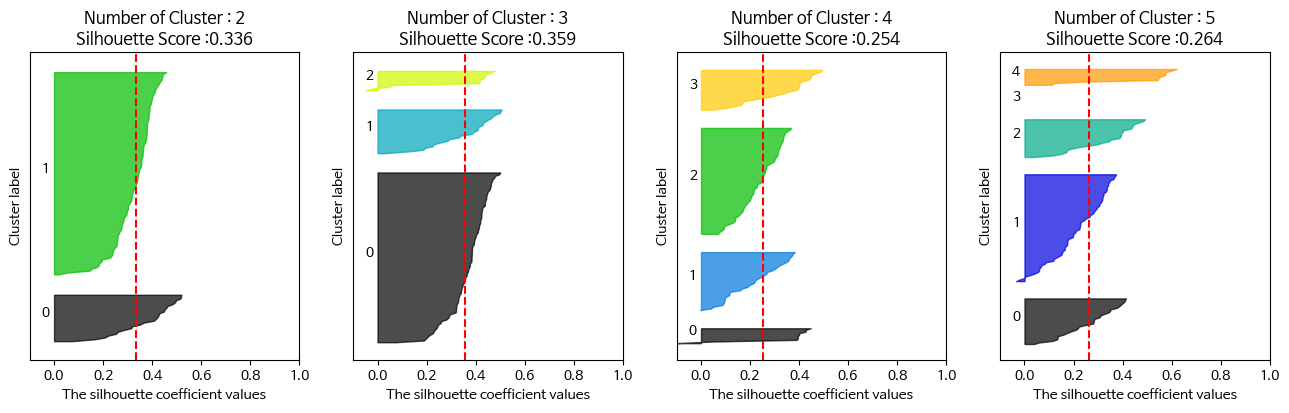

In [ ]:
# 각 cluster 개수별 silhouette 계수 기반으로 시각화하는 함수
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 개수들을 리스트로 받아서, 각 개수별로 클러스터링을 적용하고 실루엣 계수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 개수들을 차례로 iteration 수행하면서 실루엣 계수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 개수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([2, 3, 4, 5], data_std1)

In [ ]:
from sklearn.cluster import KMeans
kmeans1=KMeans(n_clusters=4, random_state=0, max_iter=500) ## 4로 하면 아래 그래프 점들의 경계가 모호함
kmeans1.fit(data_std1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=500, n_clusters=4, random_state=0)

PCA (Principal Component Analysis)에서 주성분의 개수를 설정하는 방법

* 데이터를 얼마나 잘 설명할 수 있는지에 따라 주성분의 개수를 선택한다.

1. Explained Variance Ratio:
- PCA를 적용한 후 각 주성분이 설명하는 분산의 비율을 확인하고 특정 비율 이상을 설명하는 주성분의 개수를 선택할 수 있다.
- 95% 이상의 분산을 설명하는 주성분 개수 선택

2. Scree Plot:
- 스크리 플롯을 사용하면 주성분의 개수를 시각적으로 선택할 수 있다. Scree Plot을 그려서 기울기가 완만해지기 시작하는 지점(엘보우 포인트)을 찾는다. 이 지점을 기준으로 주성분의 개수를 선택한다.
- X축: 주성분의 번호. 첫 번째 주성분부터 순서대로 나열
- Y축: 각 주성분이 설명하는 분산의 비율 (Explained Variance Ratio) 또는 고유값(Eigenvalue)
- 데이터 포인트: 각 주성분이 설명하는 분산의 비율을 점으로 표시
- 연결선: 데이터 포인트들을 연결하여 주성분 간의 변화를 시각적으로 강조

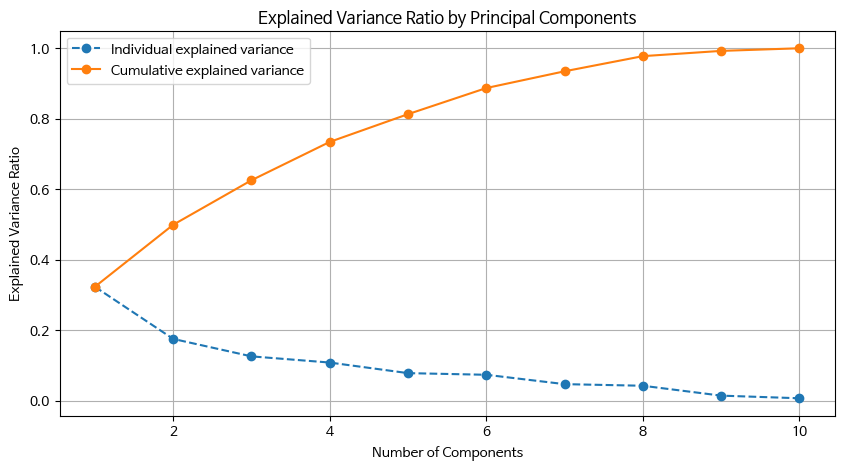

Number of components explaining at least 95% variance: 8


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA를 전체 주성분으로 fitting
pca = PCA()
pca.fit(data_std1)

# 주성분이 설명하는 분산의 비율
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Scree Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Individual explained variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend()
plt.grid()
plt.show()

# 95% 이상의 분산을 설명하는 주성분 개수
num_components_95 = next(i for i, total_var in enumerate(cumulative_explained_variance) if total_var >= 0.95) + 1
print(f"Number of components explaining at least 95% variance: {num_components_95}")

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



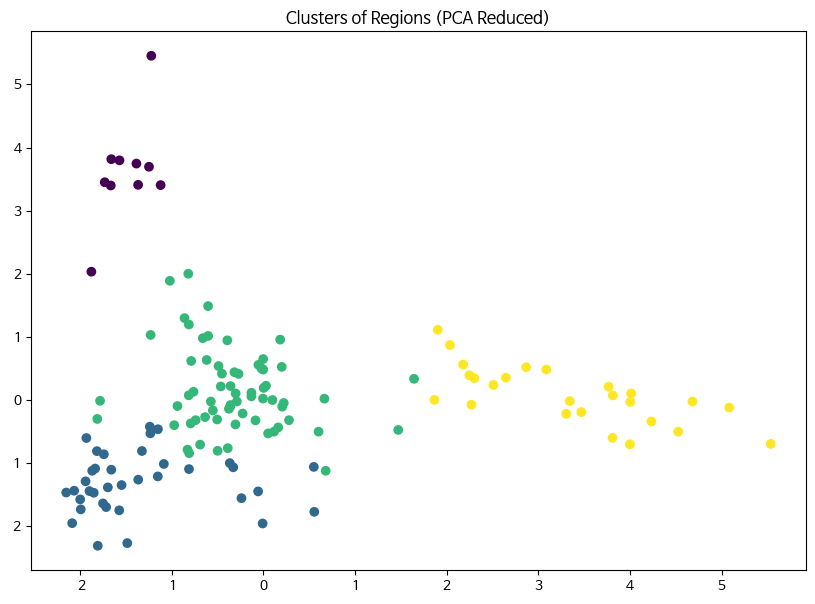

In [ ]:
# 95% 이상의 분산을 설명하는 주성분 개수 선택
pca = PCA(n_components=num_components_95)
pca_transformed = pca.fit_transform(data_std1)

# 결과를 데이터 프레임에 추가
cluster_df1['pca_x'] = pca_transformed[:, 0]
cluster_df1['pca_y'] = pca_transformed[:, 1]

# 클러스터 시각화
plt.figure(figsize=(10, 7))
plt.scatter(cluster_df1['pca_x'], cluster_df1['pca_y'], c=kmeans1.labels_, cmap='viridis')
plt.title('Clusters of Regions (PCA Reduced)')
plt.show()

In [ ]:
cluster_df1['cluster']=kmeans1.labels_
cluster_df1.to_csv('cluster_df1.csv', encoding='utf-8-sig')

In [ ]:
cluster_df1.groupby('cluster')[['Month', 'Visitor_Count', 'Activity_Ratio', 'Activity_Exp_Avg', 'Traffic_Exp_Avg', 'NoCar_Ratio', 'Season', 'Festival_Count', 'Area', 'Stop_Ratio']].median()

,Month,Visitor_Count,Activity_Ratio,Activity_Exp_Avg,Traffic_Exp_Avg,NoCar_Ratio,Season,Festival_Count,Area,Stop_Ratio
cluster,,,,,,,,,,
0,5.5,1.0,0.000000,55500.000000,9500.00000,0.000000,1.5,0.0,14.05,45.8
1,6.5,25.0,0.835946,164177.244792,5579.13351,0.052027,2.5,0.0,100.90,6.8
2,7.0,33.0,0.790698,208042.541667,4913.00000,0.046512,3.0,0.0,17.16,30.7
3,7.0,45.0,0.823529,426851.459459,307669.96000,0.061224,2.0,1.0,28.02,52.3


In [ ]:
cluster_df1.groupby('cluster')[['Month', 'Visitor_Count', 'Activity_Ratio', 'Activity_Exp_Avg', 'Traffic_Exp_Avg', 'NoCar_Ratio', 'Season', 'Festival_Count', 'Area', 'Stop_Ratio']].mean()

,Month,Visitor_Count,Activity_Ratio,Activity_Exp_Avg,Traffic_Exp_Avg,NoCar_Ratio,Season,Festival_Count,Area,Stop_Ratio
cluster,,,,,,,,,,
0,6.700000,1.200000,0.050000,63850.100000,12650.000000,0.100000,1.900000,0.000000,13.937000,43.380000
1,6.500000,27.055556,0.832125,167549.890523,9276.295751,0.063750,2.500000,0.305556,123.403333,8.566667
2,6.615385,32.615385,0.785856,201880.823472,10753.597944,0.043745,2.507692,0.076923,23.475538,27.372308
3,6.560000,41.600000,0.834338,441203.786873,319814.895933,0.061726,2.480000,1.200000,31.781200,52.668000


In [ ]:
# 클러스터의 중심
cluster_centers = kmeans1.cluster_centers_

# 결과를 데이터프레임으로 변환하여 출력
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Month', 'Visitor_Count', 'Activity_Ratio', 'Activity_Exp_Avg', 'Traffic_Exp_Avg', 'NoCar_Ratio', 'Season', 'Festival_Count', 'Area', 'Stop_Ratio'])
cluster_centers_df ## StandardScaler에 의해 평균이 0

,Month,Visitor_Count,Activity_Ratio,Activity_Exp_Avg,Traffic_Exp_Avg,NoCar_Ratio,Season,Festival_Count,Area,Stop_Ratio
0,0.035002,-1.847660,-3.161040,-1.301949,-0.440518,0.473187,-0.500542,-0.476793,-0.735321,0.929250
1,-0.023767,-0.216388,0.356241,-0.472572,-0.467705,0.079029,0.039726,-0.046067,1.451069,-1.204861
2,0.010138,0.134391,0.148168,-0.197997,-0.455800,-0.138497,0.046652,-0.368358,-0.544806,-0.052046
3,-0.006136,0.701246,0.366193,1.716076,2.034782,0.057016,0.021717,1.214785,-0.378916,1.498619


# 군집화_ver.2
* Season, Region으로 그룹화
* 인천광역시 남구 = 인천광역시 미추홀구
* 정류장 공급도 2024-01-17부터 : 전북 전주시가 2024-01-18부로 행정명이 바뀌어서 데이터 누락

## travel 군집화 전처리

In [ ]:
import pandas as pd

# 계절 열 생성
def map_month_to_season(month):
    if month in [12, 1, 2]:
        return 4  # Winter
    elif month in [3, 4, 5]:
        return 1  # Spring
    elif month in [6, 7, 8]:
        return 2  # Summer
    elif month in [9, 10, 11]:
        return 3  # Autumn

travel['Season'] = travel['D_TRA1_1_SMONTH'].apply(map_month_to_season)

# 계절별, 지역별 방문자 수
visitor = travel.groupby(['Season', 'D_TRA1_1_SPOT'])['ID'].nunique().reset_index(name='Visitor_Count')
visitor = visitor.rename(columns={'D_TRA1_1_SPOT': 'Region'})

# 선별 여행 활동 비율
## 값이 각각 2, 4, 9, 11, 12, 15로 되어있으므로 모두 1로 변환
columns_to_adjust = ['A5_2', 'A5_4', 'A5_9', 'A5_11', 'A5_12', 'A5_15']  # 'A5_1' 제외
for col in columns_to_adjust:
    travel[col] = travel[col].apply(lambda x: 1 if x > 0 else 0)

## 선별 여행 활동 칼럼에 1이 있으면 1, 없으면 0인 열 생성
travel['Any_Activity'] = travel[columns_to_adjust].max(axis=1)

## 계절별, 지역별 선별 여행 활동 개수 데이터 프레임 생성
activity_count = travel.groupby(['Season', 'D_TRA1_1_SPOT'])['Any_Activity'].sum().reset_index(name='Active_Visitor_Count')
activity_count = activity_count.rename(columns={'D_TRA1_1_SPOT': 'Region'})

## 선별 여행 활동 비율 열 생성
activity_count['Activity_Ratio'] = activity_count['Active_Visitor_Count'] / visitor['Visitor_Count']

# 선별 활동 지출 비용의 평균, 선별 교통수단 지출 비용의 평균
## 선별 활동 지출 비용의 합 열 생성
travel['Activity_Exp'] = travel['A9G_1'] + travel['A9G_2'] + travel['A9D'] + travel['A9E']
## 선별 교통수단 지출 비용의 합 열 생성
travel['Traffic_Exp'] = travel['A9F_1'] + travel['A9F_2'] + travel['A9F_3'] + travel['A9F_4']

## 계절별, 지역별 선별 활동 지출 비용의 평균, 선별 교통수단 지출 비용의 평균 데이터 프레임 생성
### 계절별, 지역별 선별 활동 지출 비용과 선별 교통수단 지출 비용의 총합 데이터 프레임 생성
total_expenditure = travel.groupby(['Season', 'D_TRA1_1_SPOT'])[['Activity_Exp', 'Traffic_Exp']].sum().reset_index()
total_expenditure = total_expenditure.rename(columns={'D_TRA1_1_SPOT': 'Region'})

### 'Visitor_Count' 값을 가져오기 위해 visitor 데이터 프레임과 병합
merged_df = total_expenditure.merge(visitor, on=['Season', 'Region'])

### 선별 활동 지출 비용의 평균, 선별 교통수단 지출 비용의 평균 열 생성
merged_df['Activity_Exp_Avg'] = merged_df['Activity_Exp'] / merged_df['Visitor_Count']
merged_df['Traffic_Exp_Avg'] = merged_df['Traffic_Exp'] / merged_df['Visitor_Count']

# 차량 보유하지 않은 방문자 비율
## 차량 보유하지 않음을 1로, 차량 보유함을 0으로 하는 NoCar 열 생성
travel['NoCar'] = travel['DQ7'].apply(lambda x: 1 if x == 2 else 0)

## 계절별, 지역별로 차량 보유하지 않은 사람 수 데이터 프레임 생성
no_car_count = travel.groupby(['Season', 'D_TRA1_1_SPOT'])['NoCar'].sum().reset_index()
no_car_count = no_car_count.rename(columns={'D_TRA1_1_SPOT': 'Region'})

## 'Visitor_Count' 값을 가져오기 위해 merged_df 데이터 프레임과 병합
merged_df = merged_df.merge(no_car_count, on=['Season', 'Region'])

## 차량 보유하지 않은 방문자 비율 열 NoCar_Ratio 생성
merged_df['NoCar_Ratio'] = merged_df['NoCar'] / merged_df['Visitor_Count']

# 데이터 프레임 병합(1)
activity_count = pd.merge(activity_count, merged_df, on=['Season', 'Region'], how='left')

# 선별 지역에 해당하는 행만 추출
spots = [39010, 39020, 37020, 32030, 36020, 32060, 21090, 34030, 37010, 35010,
         11180, 11070, 11150, 11090, 21150, 21080, 23030, 23070, 11170, 22030]
visitor = visitor[visitor['Region'].isin(spots)]
activity_count = activity_count[activity_count['Region'].isin(spots)]

# 지역 이름 변환
spot_names = {
    39010: '제주특별자치도 제주시',
    39020: '제주특별자치도 서귀포시',
    37020: '경상북도 경주시',
    32030: '강원도 강릉시',
    36020: '전라남도 여수시',
    32060: '강원도 속초시',
    21090: '부산광역시 해운대구',
    34030: '충청남도 보령시',
    37010: '경상북도 포항시',
    35010: '전라북도 전주시',
    11180: '서울특별시 금천구',
    11070: '서울특별시 중랑구',
    11150: '서울특별시 양천구',
    11090: '서울특별시 강북구',
    21150: '부산광역시 사상구',
    21080: '부산광역시 북구',
    23030: '인천광역시 미추홀구',
    23070: '인천광역시 계양구',
    11170: '서울특별시 구로구',
    22030: '대구광역시 서구'
}
visitor['Region'] = visitor['Region'].map(spot_names)
activity_count['Region'] = activity_count['Region'].map(spot_names)

# 데이터 프레임 병합(2)
travel_filtered_df = pd.merge(visitor, activity_count, on=['Season', 'Region', 'Visitor_Count'], how='left')

# Active_Visitor_Count 열 제거
travel_filtered_df = travel_filtered_df.drop(columns=['Active_Visitor_Count', 'Activity_Exp', 'Traffic_Exp', 'NoCar'])
travel_filtered_df

,Season,Region,Visitor_Count,Activity_Ratio,Activity_Exp_Avg,Traffic_Exp_Avg,NoCar_Ratio
0,1,서울특별시 양천구,1,0.000000,55000.000000,40000.000000,0.000000
1,1,서울특별시 구로구,1,0.000000,56000.000000,9000.000000,1.000000
2,1,부산광역시 해운대구,69,0.768116,236137.768116,36492.753623,0.028986
3,1,부산광역시 사상구,1,1.000000,95000.000000,0.000000,0.000000
4,1,인천광역시 미추홀구,2,0.500000,52500.000000,0.000000,0.000000
5,1,인천광역시 계양구,2,0.000000,105000.500000,7500.000000,0.000000
6,1,강원도 강릉시,96,0.854167,244719.062500,16697.916667,0.083333
7,1,강원도 속초시,68,0.676471,228088.426471,3132.338235,0.088235
8,1,충청남도 보령시,57,0.684211,182272.315789,6140.000000,0.035088
9,1,전라북도 전주시,51,0.882353,132304.078431,3333.333333,0.000000


## festival 군집화 전처리 및 병합

In [ ]:
# 선별 지역
specific_regions = [
    "제주특별자치도 제주시",
    "제주특별자치도 서귀포시",
    "경상북도 경주시",
    "강원도 강릉시",
    "전라남도 여수시",
    "강원도 속초시",
    "부산광역시 해운대구",
    "충청남도 보령시",
    "경상북도 포항시",
    "전라북도 전주시",
    "서울특별시 금천구",
    "서울특별시 중랑구",
    "서울특별시 양천구",
    "서울특별시 강북구",
    "부산광역시 사상구",
    "부산광역시 북구",
    "인천광역시 미추홀구",
    "인천광역시 계양구",
    "서울특별시 구로구",
    "대구광역시 서구"
]

# 선별 지역에 해당하는 행만 추출
festival_filtered_df = festival_df[festival_df['Region'].isin(specific_regions)]
festival_filtered_df = festival_filtered_df.groupby(['Season', 'Region'])['FCLTY_NM_Count'].sum().reset_index()

# travel 군집화 데이터와 festival 군집화 데이터 병합
travel_festival_df = pd.merge(travel_filtered_df, festival_filtered_df, on=['Region', 'Season'], how='left')
travel_festival_df = travel_festival_df.fillna(0)
travel_festival_df

,Season,Region,Visitor_Count,Activity_Ratio,Activity_Exp_Avg,Traffic_Exp_Avg,NoCar_Ratio,FCLTY_NM_Count
0,1,서울특별시 양천구,1,0.000000,55000.000000,40000.000000,0.000000,0.0
1,1,서울특별시 구로구,1,0.000000,56000.000000,9000.000000,1.000000,0.0
2,1,부산광역시 해운대구,69,0.768116,236137.768116,36492.753623,0.028986,0.0
3,1,부산광역시 사상구,1,1.000000,95000.000000,0.000000,0.000000,0.0
4,1,인천광역시 미추홀구,2,0.500000,52500.000000,0.000000,0.000000,0.0
5,1,인천광역시 계양구,2,0.000000,105000.500000,7500.000000,0.000000,0.0
6,1,강원도 강릉시,96,0.854167,244719.062500,16697.916667,0.083333,0.0
7,1,강원도 속초시,68,0.676471,228088.426471,3132.338235,0.088235,0.0
8,1,충청남도 보령시,57,0.684211,182272.315789,6140.000000,0.035088,0.0
9,1,전라북도 전주시,51,0.882353,132304.078431,3333.333333,0.000000,1.0


## 정류장 공급도 데이터 전처리 및 병합

In [ ]:
# 데이터 불러오기
traffic = pd.read_csv("/content/traffic_recent.csv", encoding='cp949')
# Map the spots in the traffic dataframe
traffic['Region'] = traffic['시도'] + ' ' + traffic['시군구']
traffic = traffic.drop(columns=['시도', '시군구'])

# travel_festival_df와 병합
cluster_df2 = pd.merge(travel_festival_df, traffic, on='Region', how='left')
cluster_df2 = cluster_df2.drop(columns=['정류장수'])
cluster_df2.columns=['Season',	'Region',	'Visitor_Count',	'Activity_Ratio',	'Activity_Exp_Avg',	'Traffic_Exp_Avg',	'NoCar_Ratio', 'Festival_Count', 'Area', 'Stop_Ratio']
cluster_df2

,Season,Region,Visitor_Count,Activity_Ratio,Activity_Exp_Avg,Traffic_Exp_Avg,NoCar_Ratio,Festival_Count,Area,Stop_Ratio
0,1,서울특별시 양천구,1,0.000000,55000.000000,40000.000000,0.000000,0.0,13.43,40.4
1,1,서울특별시 구로구,1,0.000000,56000.000000,9000.000000,1.000000,0.0,14.98,49.9
2,1,부산광역시 해운대구,69,0.768116,236137.768116,36492.753623,0.028986,0.0,17.16,34.4
3,1,부산광역시 사상구,1,1.000000,95000.000000,0.000000,0.000000,0.0,15.28,33.8
4,1,인천광역시 미추홀구,2,0.500000,52500.000000,0.000000,0.000000,0.0,20.42,25.3
5,1,인천광역시 계양구,2,0.000000,105000.500000,7500.000000,0.000000,0.0,14.05,40.4
6,1,강원도 강릉시,96,0.854167,244719.062500,16697.916667,0.083333,0.0,24.65,30.7
7,1,강원도 속초시,68,0.676471,228088.426471,3132.338235,0.088235,0.0,9.65,18.8
8,1,충청남도 보령시,57,0.684211,182272.315789,6140.000000,0.035088,0.0,14.68,31.0
9,1,전라북도 전주시,51,0.882353,132304.078431,3333.333333,0.000000,1.0,100.90,5.5


## 군집화 모델링 및 결과

In [ ]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

target2=cluster_df2[['Season', 'Visitor_Count', 'Activity_Ratio', 'Activity_Exp_Avg', 'Traffic_Exp_Avg', 'NoCar_Ratio', 'Festival_Count', 'Area', 'Stop_Ratio']]
data_std2=scaler.fit_transform(target2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



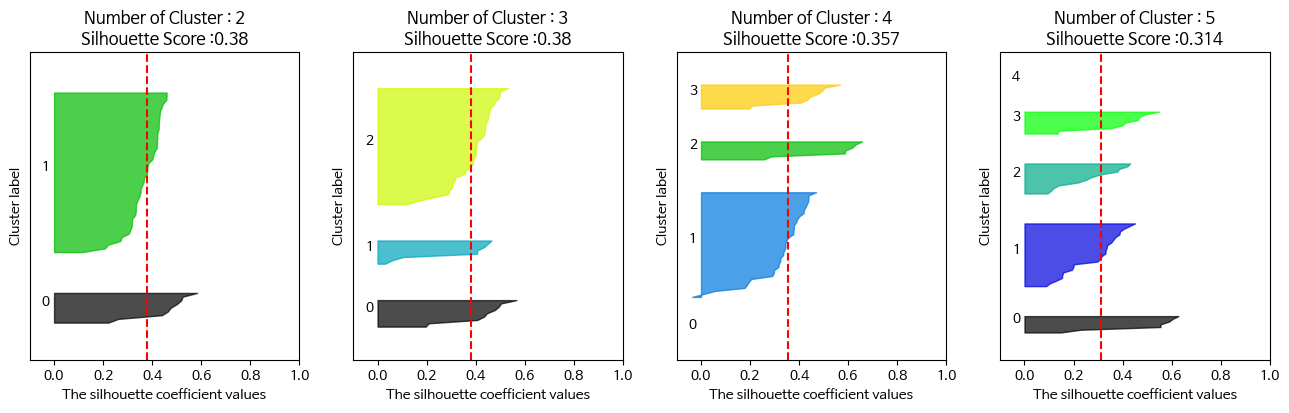

In [ ]:
# 각 cluster 개수별 silhouette 점수 기반으로 시각화하는 함수
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([2, 3, 4, 5], data_std2)

In [ ]:
kmeans2=KMeans(n_clusters=3, random_state=0, max_iter=500)
kmeans2.fit(data_std2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=500, n_clusters=3, random_state=0)

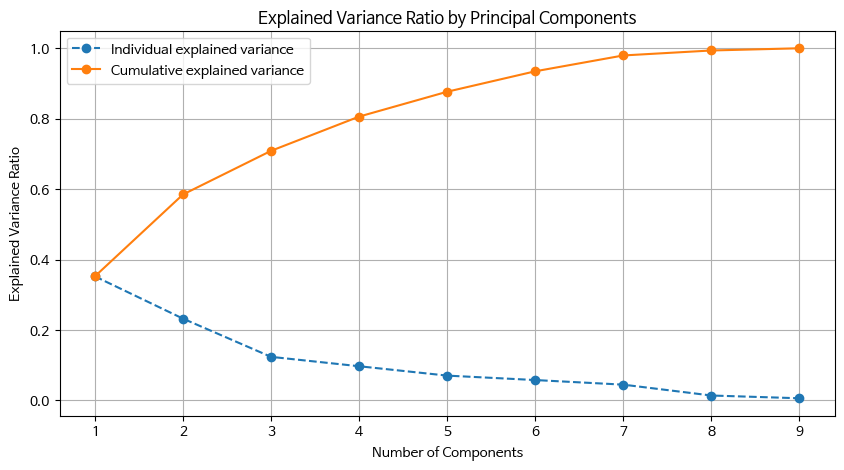

Number of components explaining at least 95% variance: 7


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# PCA를 전체 주성분으로 fitting
pca = PCA()
pca.fit(data_std2)

# 주성분이 설명하는 분산의 비율
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Individual explained variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', label='Cumulative explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend()
plt.grid()
plt.show()

# 95% 이상의 분산을 설명하는 주성분의 개수
num_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components explaining at least 95% variance: {num_components_95}")

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



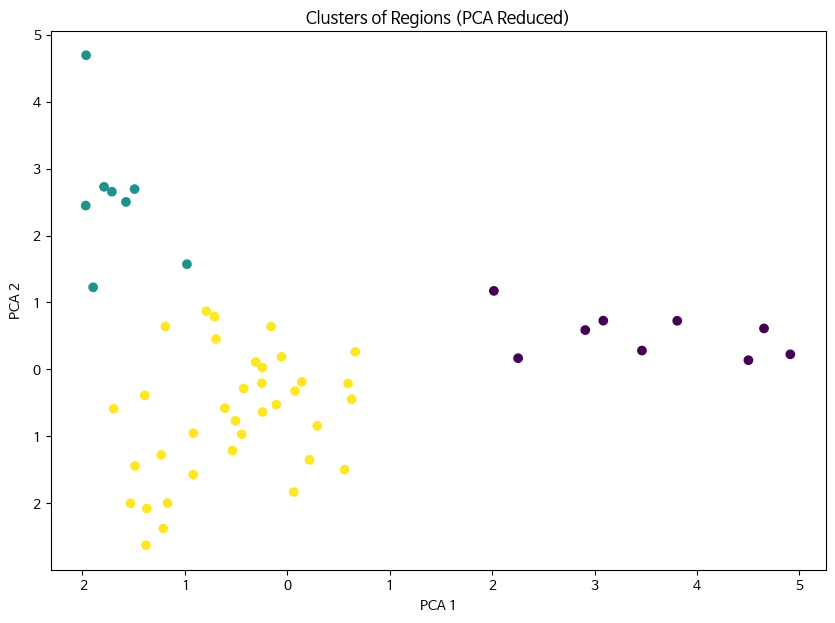

In [ ]:
# 95% 이상의 분산을 설명하는 주성분의 개수 선택
pca = PCA(n_components=num_components_95)
pca_transformed = pca.fit_transform(data_std2)

# 결과를 데이터프레임에 추가
cluster_df2['pca_x'] = pca_transformed[:, 0]
cluster_df2['pca_y'] = pca_transformed[:, 1]

# 클러스터 시각화
plt.figure(figsize=(10, 7))
plt.scatter(cluster_df2['pca_x'], cluster_df2['pca_y'], c=kmeans2.labels_, cmap='viridis')
plt.title('Clusters of Regions (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
cluster_df2['cluster']=kmeans2.labels_
cluster_df2.to_csv('cluster_df2.csv', encoding='utf-8-sig')

In [ ]:
cluster_df2.groupby('cluster')[['Season', 'Visitor_Count', 'Activity_Ratio', 'Activity_Exp_Avg', 'Traffic_Exp_Avg',	'NoCar_Ratio', 'Festival_Count', 'Area', 'Stop_Ratio']].median()

,Season,Visitor_Count,Activity_Ratio,Activity_Exp_Avg,Traffic_Exp_Avg,NoCar_Ratio,Festival_Count,Area,Stop_Ratio
cluster,,,,,,,,,
0,2.0,131.0,0.841270,424809.320611,319710.707143,0.057325,3.0,28.020,52.3
1,1.5,2.0,0.000000,64666.666667,8666.666667,0.000000,0.0,14.515,45.9
2,3.0,85.5,0.786607,174486.213986,6101.914894,0.044447,0.0,24.650,19.1


In [ ]:
cluster_df2.groupby('cluster')[['Season', 'Visitor_Count', 'Activity_Ratio', 'Activity_Exp_Avg', 'Traffic_Exp_Avg',	'NoCar_Ratio', 'Festival_Count', 'Area', 'Stop_Ratio']].mean()

,Season,Visitor_Count,Activity_Ratio,Activity_Exp_Avg,Traffic_Exp_Avg,NoCar_Ratio,Festival_Count,Area,Stop_Ratio
cluster,,,,,,,,,
0,2.444444,115.555556,0.847724,442264.244170,327001.404563,0.059361,3.333333,30.254444,52.344444
1,1.750000,1.875000,0.145833,63520.937500,18862.500000,0.125000,0.000000,14.267500,43.450000
2,2.527778,85.861111,0.813443,181287.146939,9096.996243,0.048561,0.472222,56.078056,21.047222


In [ ]:
# 클러스터의 중심
cluster_centers = kmeans2.cluster_centers_

# 결과를 데이터프레임으로 변환하여 출력
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Season', 'Visitor_Count', 'Activity_Ratio', 'Activity_Exp_Avg', 'Traffic_Exp_Avg', 'NoCar_Ratio', 'Festival_Count', 'Area', 'Stop_Ratio'])
cluster_centers_df ## StandardScaler에 의해 평균이 0인 것을 토대로 해석

,Season,Visitor_Count,Activity_Ratio,Activity_Exp_Avg,Traffic_Exp_Avg,NoCar_Ratio,Festival_Count,Area,Stop_Ratio
0,0.043648,0.722999,0.472717,1.842170,2.172203,-0.019066,1.438434,-0.314354,1.384523
1,-0.584979,-1.478790,-2.094746,-1.133946,-0.378183,0.467644,-0.521386,-0.646568,0.839656
2,0.119083,0.147870,0.347320,-0.208554,-0.459010,-0.099154,-0.243745,0.222270,-0.532721


# 워드 클라우드 시각화

In [ ]:
#패키지 임포트
import pandas as pd

import requests

import json

import warnings
warnings.filterwarnings('ignore')

import re

from konlpy.tag import Okt

from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
def blog_scrap(query, pages):

  title_list = []

  num_blogs = pages*10
  scraped_num = 0

  #json 형식으로, 한 페이지 당 10개의 블로그, 정확도순으로 내림차순 정렬
  while scraped_num < num_blogs:
    main_url = f"https://openapi.naver.com/v1/search/blog.json?query={query}&display=10&start={scraped_num + 1}&sort=sim"
    req = requests.get(main_url, headers = headers)    # 해당 페이지를 가져옴
    data_json = req.json()
    data = data_json['items']
    for item in data:
      title_list.append(item['title'])

    scraped_num += 10

  titles = "".join(title_list)
  titles = re.sub(r'\s+', ' ', titles)  # 연속된 공백을 하나의 공백으로
  titles = re.sub(r'<[^>]+>', '', titles)  #html 태그 제거

  #Okt 객체 생성
  okt = Okt()

  # 텍스트에서 명사 추출
  nouns = okt.nouns(titles)

  #두 글자 이상 단어만 추출
  nouns_long = [i for i in nouns if len(i) > 1]

  #명사별 빈도 계산
  noun_counts = Counter(nouns_long)

  #불용어 설정
  search_terms = set(query.split())
  custom_stopwords = {'여행', '추천', '가볼만한곳', '코스', '가볼', '만한', '맛집', '후기'}
  all_stopwords = search_terms.union(custom_stopwords)

  # 2번 이상 출현한 단어들만 필터링
  filtered_noun_counts = {noun: count for noun, count in noun_counts.items() if count >= 2 and noun not in all_stopwords}

  #클라우드 생성
  wordcloud = WordCloud(font_path=font_path, width=800, height=800, background_color='white', stopwords=search_terms).generate_from_frequencies(filtered_noun_counts)

  # 워드 클라우드 시각화
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

검색어 입력하시오: 여수 여행


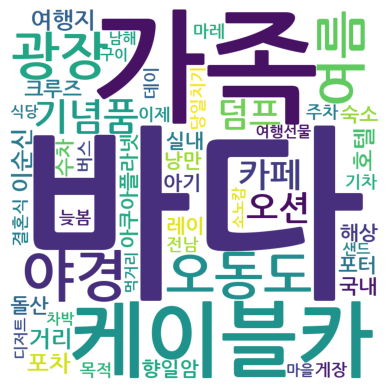

In [ ]:
query = input("검색어 입력하시오: ")
blog_scrap(query, 10)

검색어 입력하시오: 인천 계양 여행


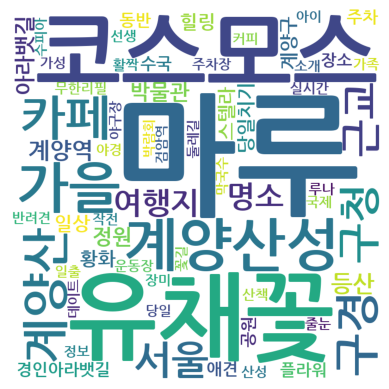

In [ ]:
query = input("검색어 입력하시오: ")
blog_scrap(query, 10)

검색어 입력하시오: 제주 서귀포 서귀포시 여행


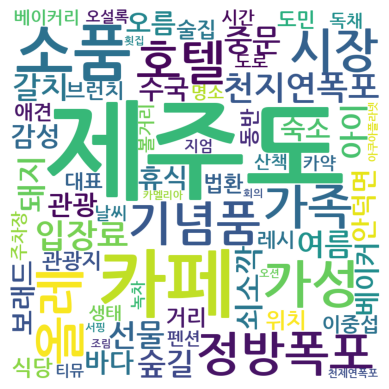

In [ ]:
query = input("검색어 입력하시오: ")
blog_scrap(query, 10)